<a href="https://colab.research.google.com/github/eric-pding/CIND820-Project/blob/main/%5BFinal_Ver%5D_CIND820_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Setup Packages & Import Data

## 1.0 Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.1 Import packages

Packages that will be used throughout the whole project:

In [2]:
# basics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The following packages are for:
- Stage 4 - Constructing the pipeline and
- Stage 5 - Evaluation & Comparison of Models

In [3]:
# Feature Selection
from sklearn.feature_selection import mutual_info_classif, SelectKBest, RFE

In [4]:
# Sampling
from imblearn.over_sampling import SMOTE, SMOTENC

In [5]:
# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [6]:
# Nearest neighbors imputation - Only for DT algo
# https://scikit-learn.org/stable/modules/impute.html#nearest-neighbors-imputation
from sklearn.impute import KNNImputer

In [7]:
# Pipeline construction

#from sklearn.pipeline import Pipeline (as alternative)
from imblearn.pipeline import Pipeline as imbalanced_pipeline

In [8]:
# Cross-validator
from sklearn.model_selection import cross_validate
import sklearn.metrics
from sklearn.metrics import classification_report

In [9]:
# Memory Usage Stat
import tracemalloc

## 1.2 Read Dataset & make a copy

In [10]:
# Read Dataset:
raw_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TMU-CIND820/data.csv") #read the dataset
data = raw_data.copy() #make a copy so that the original data is not affected

# 2 Explore Data (No Modification of Dataset in this Step)

## 2.1 Modify the output limit in Pandas
Otherwise, the output will be truncated

> Ref: https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html#options

In [11]:
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)


In [12]:
print("Max row is:",pd.options.display.max_rows,"\n Max Column is:",pd.options.display.max_columns)

Max row is: 1000 
 Max Column is: 1000


In [13]:
#Resetting all options
#pd.reset_option("all")


## 2.2 Check Data for:
- Basic Descriptions (data types, range, dimensions, etc)
- Missing / Null / NaN Values
- Duplicate Values

### Conclusion:
 - the dimension of the dataframe is: (6819, 96)
 - no null values detected
 - There is no NaN value & no duplicated values detected
 - all of the data are quantitative data, which have two types: int64 and float64.
  - int64 are actually categorical variable

- Apparent outliers exist in the dataset, which seems to be data clerical error because the author of dataset already normalized the data. (Explained in more details in the next sub-section)



    

    



In [14]:
print("the dimension of the dataframe is:",data.shape) #what is the dimension

the dimension of the dataframe is: (6819, 96)


In [15]:
data.info() #data types & non-null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [16]:
data.isna().sum() #no null values detected

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

In [17]:
data.describe().T

count          mean  \
Bankrupt?                                           6819.0  3.226280e-02   
 ROA(C) before interest and depreciation before...  6819.0  5.051796e-01   
 ROA(A) before interest and % after tax             6819.0  5.586249e-01   
 ROA(B) before interest and depreciation after tax  6819.0  5.535887e-01   
 Operating Gross Margin                             6819.0  6.079480e-01   
 Realized Sales Gross Margin                        6819.0  6.079295e-01   
 Operating Profit Rate                              6819.0  9.987551e-01   
 Pre-tax net Interest Rate                          6819.0  7.971898e-01   
 After-tax net Interest Rate                        6819.0  8.090836e-01   
 Non-industry income and expenditure/revenue        6819.0  3.036229e-01   
 Continuous interest rate (after tax)               6819.0  7.813814e-01   
 Operating Expense Rate                             6819.0  1.995347e+09   
 Research and development expense rate              6819.0  1.950427e+09   
 Cash flow rate                                     6819.0  4.674312e-01   
 Interest-bearing debt interest rate                6819.0  1.644801e+07   
 Tax rate (A)                                       6819.0  1.150007e-01   
 Net Value Per Share (B)                            6819.0  1.906606e-01   
 Net Value Per Share (A)                            6819.0  1.906332e-01   
 Net Value Per Share (C)                            6819.0  1.906724e-01   
 Persistent EPS in the Last Four Seasons            6819.0  2.288129e-01   
 Cash Flow Per Share                                6819.0  3.234819e-01   
 Revenue Per Share (Yuan ¥)                         6819.0  1.328641e+06   
 Operating Profit Per Share (Yuan ¥)                6819.0  1.090907e-01   
 Per Share Net profit before tax (Yuan ¥)           6819.0  1.843606e-01   
 Realized Sales Gross Profit Growth Rate            6819.0  2.240785e-02   
 Operating Profit Growth Rate                       6819.0  8.479800e-01   
 After-tax Net Profit Growth Rate                   6819.0  6.891461e-01   
 Regular Net Profit Growth Rate                     6819.0  6.891500e-01   
 Continuous Net Profit Growth Rate                  6819.0  2.176390e-01   
 Total Asset Growth Rate                            6819.0  5.508097e+09   
 Net Value Growth Rate                              6819.0  1.566212e+06   
 Total Asset Return Growth Rate Ratio               6819.0  2.642475e-01   
 Cash Reinvestment %                                6819.0  3.796767e-01   
 Current Ratio                                      6819.0  4.032850e+05   
 Quick Ratio                                        6819.0  8.376595e+06   
 Interest Expense Ratio                             6819.0  6.309910e-01   
 Total debt/Total net worth                         6819.0  4.416337e+06   
 Debt ratio %                                       6819.0  1.131771e-01   
 Net worth/Assets                                   6819.0  8.868229e-01   
 Long-term fund suitability ratio (A)               6819.0  8.782734e-03   
 Borrowing dependency                               6819.0  3.746543e-01   
 Contingent liabilities/Net worth                   6819.0  5.968277e-03   
 Operating profit/Paid-in capital                   6819.0  1.089767e-01   
 Net profit before tax/Paid-in capital              6819.0  1.827150e-01   
 Inventory and accounts receivable/Net value        6819.0  4.024593e-01   
 Total Asset Turnover                               6819.0  1.416056e-01   
 Accounts Receivable Turnover                       6819.0  1.278971e+07   
 Average Collection Days                            6819.0  9.826221e+06   
 Inventory Turnover Rate (times)                    6819.0  2.149106e+09   
 Fixed Assets Turnover Frequency                    6819.0  1.008596e+09   
 Net Worth Turnover Rate (times)                    6819.0  3.859505e-02   
 Revenue per person                                 6819.0  2.325854e+06   
 Operating profit per per

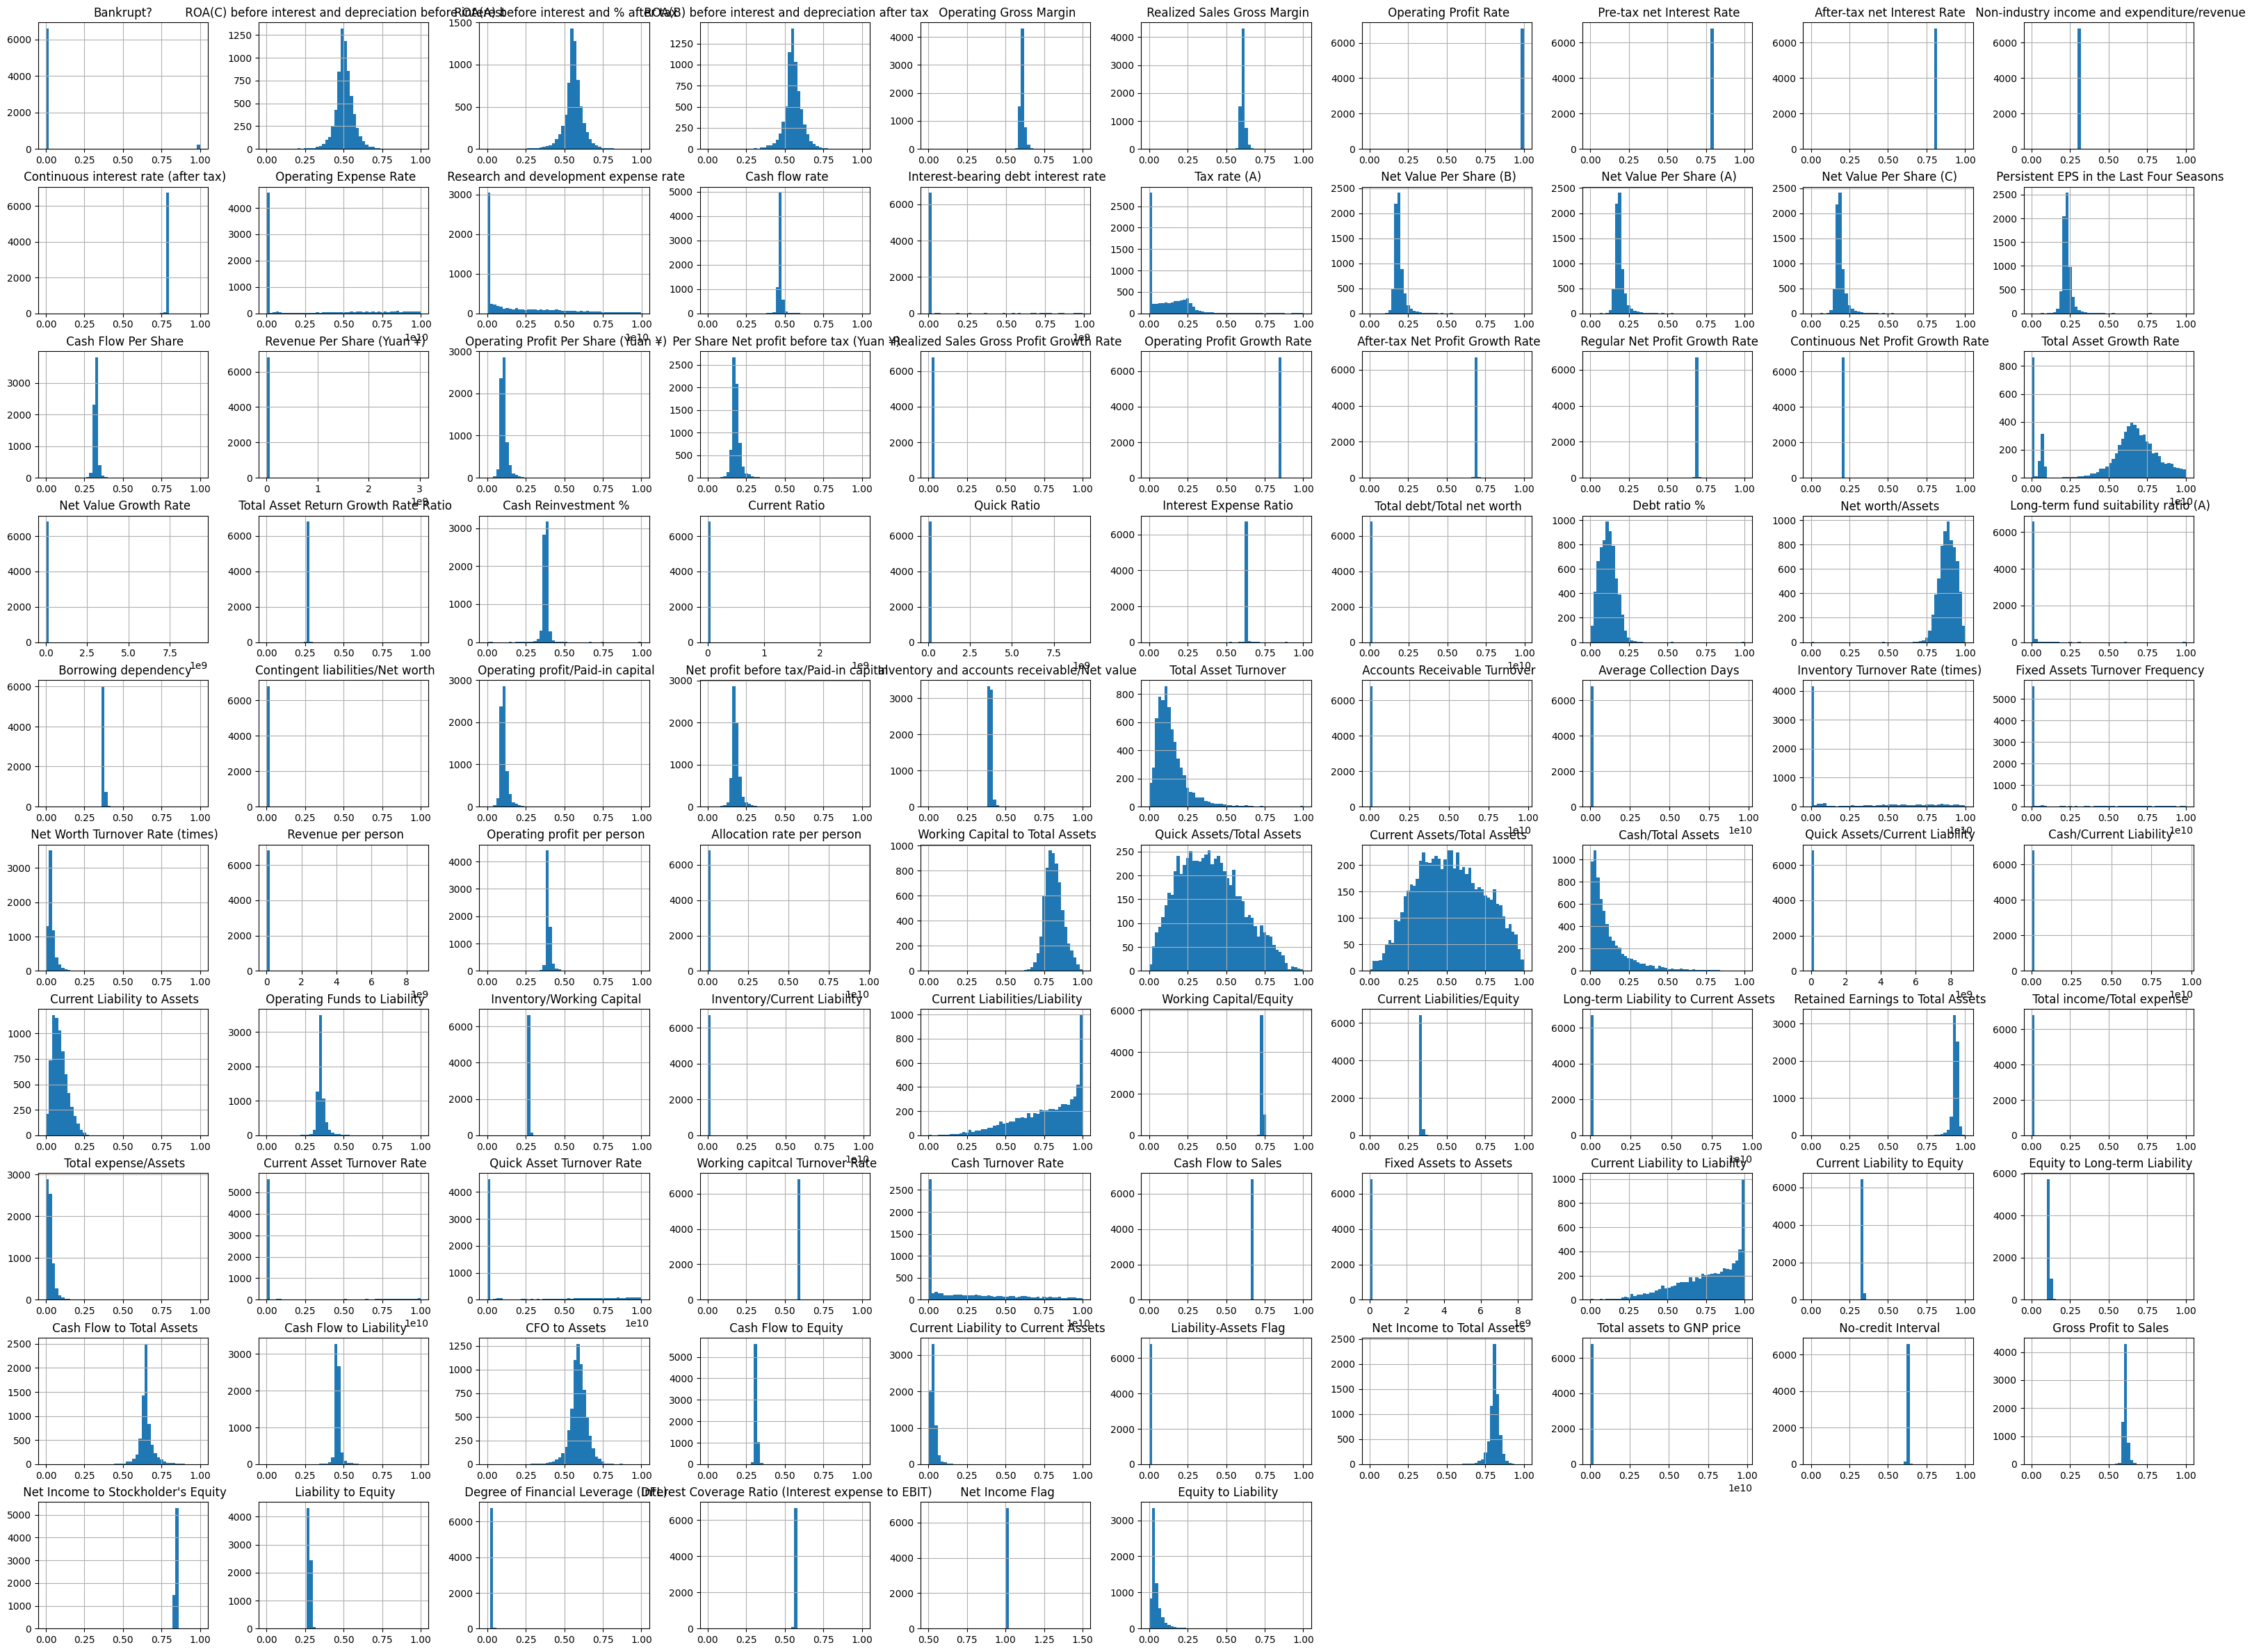

In [18]:
# Looking at the histograms of the features
data.hist(figsize = (40,30), bins = 50)
plt.show()

## 2.3 Outlier Detection
### Conclusion:
After looking at the outlier detection charts and played with the figures, I detected that there seems to be some typos that happens to be roughly **10,000,000,000** times greater than it's real value, which caused some features have a VERY BIG max value. (such as "Fixed Assets to Assets", the theoretical max should be 1, anything greater than 1 makes no sense)


> Note: Taiwan researcher who made this data said they normalized the data to 0-1 range, therefore anything >1 should be data error.

> Ref: Liang, Deron & Lu, Chia-Chi & Tsai, Chih-Fong & Shih, Guan-An, 2016. "Financial ratios and corporate governance indicators in bankruptcy prediction: A comprehensive study," European Journal of Operational Research, Elsevier, vol. 252(2), pages 561-572.



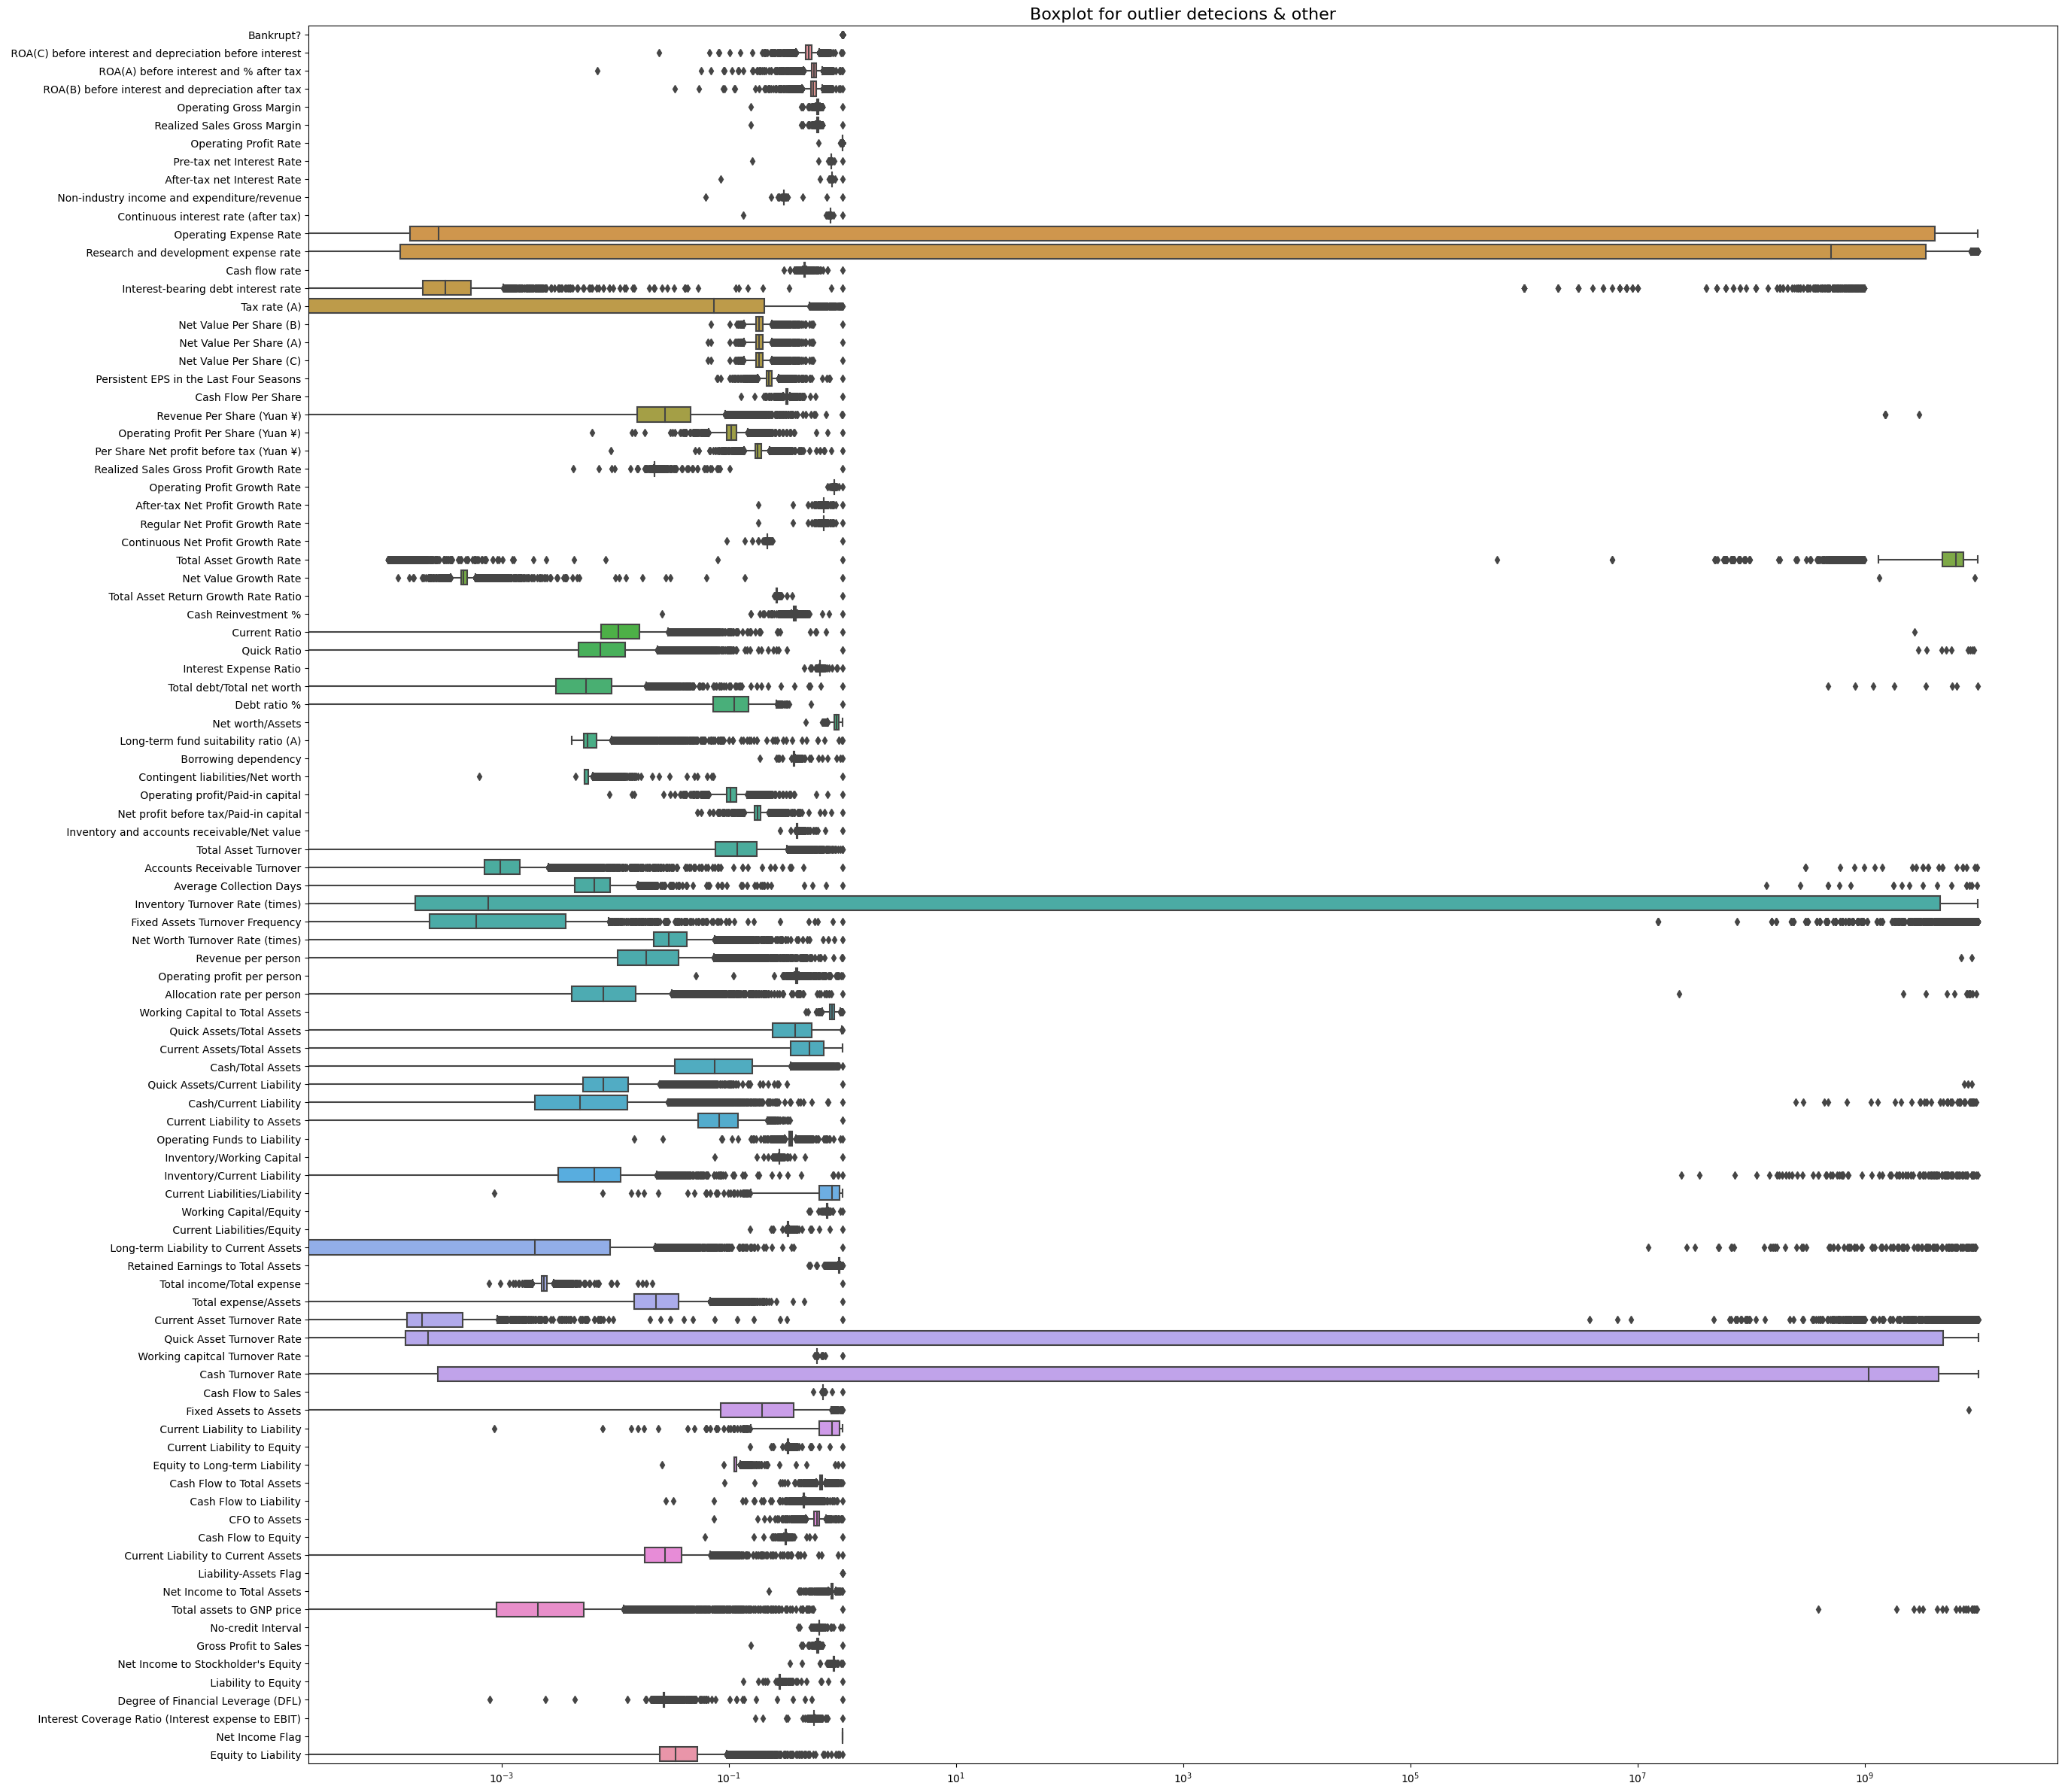

In [19]:
# Visualization: Boxplots - some data have extreme outliers
plt.figure(figsize = (30,30))
ax = sns.boxplot(data = data, orient="h") #change the orientation to horizontal
ax.set_title('Boxplot for outlier detecions & other', fontsize = 16)
ax.set(xscale="log")
plt.show()

In [20]:
# Check the data within [0,1] range
data_without_outlier = data[data <= 1]
data_without_outlier.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            6819.000000              4537.000000   
mean                                0.781381                 0.000634   
std                                 0.012679                 0.015961   
min                 

In [21]:
data_outlier = data[data > 1]
data_outlier.describe().T

count          mean  \
Bankrupt?                                              0.0           NaN   
 ROA(C) before interest and depreciation before...     0.0           NaN   
 ROA(A) before interest and % after tax                0.0           NaN   
 ROA(B) before interest and depreciation after tax     0.0           NaN   
 Operating Gross Margin                                0.0           NaN   
 Realized Sales Gross Margin                           0.0           NaN   
 Operating Profit Rate                                 0.0           NaN   
 Pre-tax net Interest Rate                             0.0           NaN   
 After-tax net Interest Rate                           0.0           NaN   
 Non-industry income and expenditure/revenue           0.0           NaN   
 Continuous interest rate (after tax)                  0.0           NaN   
 Operating Expense Rate                             2282.0  5.962434e+09   
 Research and development expense rate              4033.0  3.297784e+09   
 Cash flow rate                                        0.0           NaN   
 Interest-bearing debt interest rate                 221.0  5.075068e+08   
 Tax rate (A)                                          0.0           NaN   
 Net Value Per Share (B)                               0.0           NaN   
 Net Value Per Share (A)                               0.0           NaN   
 Net Value Per Share (C)                               0.0           NaN   
 Persistent EPS in the Last Four Seasons               0.0           NaN   
 Cash Flow Per Share                                   0.0           NaN   
 Revenue Per Share (Yuan ¥)                            5.0  1.812000e+09   
 Operating Profit Per Share (Yuan ¥)                   0.0           NaN   
 Per Share Net profit before tax (Yuan ¥)              0.0           NaN   
 Realized Sales Gross Profit Growth Rate               0.0           NaN   
 Operating Profit Growth Rate                          0.0           NaN   
 After-tax Net Profit Growth Rate                      0.0           NaN   
 Regular Net Profit Growth Rate                        0.0           NaN   
 Continuous Net Profit Growth Rate                     0.0           NaN   
 Total Asset Growth Rate                            6017.0  6.242265e+09   
 Net Value Growth Rate                                 2.0  5.340000e+09   
 Total Asset Return Growth Rate Ratio                  0.0           NaN   
 Cash Reinvestment %                                   0.0           NaN   
 Current Ratio                                         1.0  2.750000e+09   
 Quick Ratio                                           9.0  6.346667e+09   
 Interest Expense Ratio                                0.0           NaN   
 Total debt/Total net worth                            8.0  3.764375e+09   
 Debt ratio %                                          0.0           NaN   
 Net worth/Assets                                      0.0           NaN   
 Long-term fund suitability ratio (A)                  0.0           NaN   
 Borrowing dependency                                  0.0           NaN   
 Contingent liabilities/Net worth                      0.0           NaN   
 Operating profit/Paid-in capital                      0.0           NaN   
 Net profit before tax/Paid-in capital                 0.0           NaN   
 Inventory and accounts receivable/Net value           0.0           NaN   
 Total Asset Turnover                                  0.0           NaN   
 Accounts Receivable Turnover                         22.0  3.964227e+09   
 Average Collection Days                              18.0  3.722500e+09   
 Inventory Turnover Rate (times)                    2946.0  4.974458e+09   
 Fixed Assets Turnover Frequency                    1228.0  5.600664e+09   
 Net Worth Turnover Rate (times)                       0.0           NaN   
 Revenue per person                                    2.0  7.930000e+09   
 Operating profit per per

In [22]:
data_outlier_transform = data_outlier / 10000000000
data_outlier_transform.describe().T

count      mean  \
Bankrupt?                                              0.0       NaN   
 ROA(C) before interest and depreciation before...     0.0       NaN   
 ROA(A) before interest and % after tax                0.0       NaN   
 ROA(B) before interest and depreciation after tax     0.0       NaN   
 Operating Gross Margin                                0.0       NaN   
 Realized Sales Gross Margin                           0.0       NaN   
 Operating Profit Rate                                 0.0       NaN   
 Pre-tax net Interest Rate                             0.0       NaN   
 After-tax net Interest Rate                           0.0       NaN   
 Non-industry income and expenditure/revenue           0.0       NaN   
 Continuous interest rate (after tax)                  0.0       NaN   
 Operating Expense Rate                             2282.0  0.596243   
 Research and development expense rate              4033.0  0.329778   
 Cash flow rate                                        0.0       NaN   
 Interest-bearing debt interest rate                 221.0  0.050751   
 Tax rate (A)                                          0.0       NaN   
 Net Value Per Share (B)                               0.0       NaN   
 Net Value Per Share (A)                               0.0       NaN   
 Net Value Per Share (C)                               0.0       NaN   
 Persistent EPS in the Last Four Seasons               0.0       NaN   
 Cash Flow Per Share                                   0.0       NaN   
 Revenue Per Share (Yuan ¥)                            5.0  0.181200   
 Operating Profit Per Share (Yuan ¥)                   0.0       NaN   
 Per Share Net profit before tax (Yuan ¥)              0.0       NaN   
 Realized Sales Gross Profit Growth Rate               0.0       NaN   
 Operating Profit Growth Rate                          0.0       NaN   
 After-tax Net Profit Growth Rate                      0.0       NaN   
 Regular Net Profit Growth Rate                        0.0       NaN   
 Continuous Net Profit Growth Rate                     0.0       NaN   
 Total Asset Growth Rate                            6017.0  0.624227   
 Net Value Growth Rate                                 2.0  0.534000   
 Total Asset Return Growth Rate Ratio                  0.0       NaN   
 Cash Reinvestment %                                   0.0       NaN   
 Current Ratio                                         1.0  0.275000   
 Quick Ratio                                           9.0  0.634667   
 Interest Expense Ratio                                0.0       NaN   
 Total debt/Total net worth                            8.0  0.376437   
 Debt ratio %                                          0.0       NaN   
 Net worth/Assets                                      0.0       NaN   
 Long-term fund suitability ratio (A)                  0.0       NaN   
 Borrowing dependency                                  0.0       NaN   
 Contingent liabilities/Net worth                      0.0       NaN   
 Operating profit/Paid-in capital                      0.0       NaN   
 Net profit before tax/Paid-in capital                 0.0       NaN   
 Inventory and accounts receivable/Net value           0.0       NaN   
 Total Asset Turnover                                  0.0       NaN   
 Accounts Receivable Turnover                         22.0  0.396423   
 Average Collection Days                              18.0  0.372250   
 Inventory Turnover Rate (times)                    2946.0  0.497446   
 Fixed Assets Turnover Frequency                    1228.0  0.560066   
 Net Worth Turnover Rate (times)                       0.0       NaN   
 Revenue per person                                    2.0  0.793000   
 Operating profit per person                           0.0       NaN   
 Allocation rate per person                           12.0  0.639610   
 Working Capital to Total Assets                       0.0       NaN   
 Quick Assets/Total A

## 2.4 Study the imbalance of dataset

Summary: we can see from the chart and the calculation that only a small fraction of the total dataset is "bankrupt" cases (only 3.23% of total), which means we need to tackle class imbalance using **oversampling / undersampling technique**


> *SMOTE Technique?* Synthetic minority oversampling technique

In [23]:
data['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [24]:
data[data['Bankrupt?']==1].count()[0] #count how many bankruptcy are there

220

In [25]:
data['Bankrupt?'].sum() / data['Bankrupt?'].count()
# sum is the total number of "1"s in the data set, which can also count how many bankruptcy are there
# count is the total number of companies in the dataset

0.03226279513125092

Text(0.5, 1.0, 'Check the imbalance of Bankruptcy target variable')

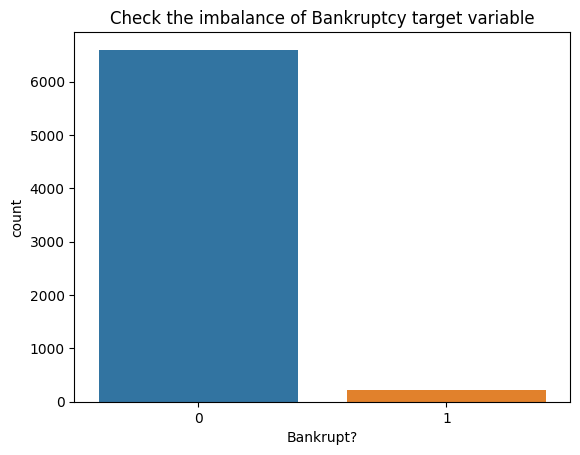

In [26]:
sns.countplot(x =data['Bankrupt?'])
plt.title('Check the imbalance of Bankruptcy target variable')
# https://seaborn.pydata.org/generated/seaborn.countplot.html

## 2.5 Study the correlation
Summary:

Using the Correlation matrix, I can discover some highly correlated groups, such as:
ROA(A) & ROA(B) & ROA(C)

Operating Profit Rate & Operating Profit Per Share & Operating Profit/paid-in Capital & Total Income/Total Expense & Net Income/Total Assets & ROA(a or B or C) **[This is actually all related to different efficiency indicators - from topline to bottom line]**



> Should they be removed?

In [27]:
data.corr('spearman')

Bankrupt?  \
Bankrupt?                                            1.000000   
 ROA(C) before interest and depreciation before...  -0.223589   
 ROA(A) before interest and % after tax             -0.222410   
 ROA(B) before interest and depreciation after tax  -0.224163   
 Operating Gross Margin                             -0.147648   
 Realized Sales Gross Margin                        -0.146563   
 Operating Profit Rate                              -0.183392   
 Pre-tax net Interest Rate                          -0.219694   
 After-tax net Interest Rate                        -0.220308   
 Non-industry income and expenditure/revenue        -0.204846   
 Continuous interest rate (after tax)               -0.227621   
 Operating Expense Rate                              0.009967   
 Research and development expense rate              -0.038467   
 Cash flow rate                                     -0.144660   
 Interest-bearing debt interest rate                 0.116011   
 Tax rate (A)                                       -0.158044   
 Net Value Per Share (B)                            -0.205633   
 Net Value Per Share (A)                            -0.205406   
 Net Value Per Share (C)                            -0.203778   
 Persistent EPS in the Last Four Seasons            -0.238209   
 Cash Flow Per Share                                -0.130262   
 Revenue Per Share (Yuan ¥)                         -0.074938   
 Operating Profit Per Share (Yuan ¥)                -0.191981   
 Per Share Net profit before tax (Yuan ¥)           -0.232442   
 Realized Sales Gross Profit Growth Rate            -0.091424   
 Operating Profit Growth Rate                       -0.094262   
 After-tax Net Profit Growth Rate                   -0.124115   
 Regular Net Profit Growth Rate                     -0.122185   
 Continuous Net Profit Growth Rate                  -0.125084   
 Total Asset Growth Rate                            -0.085787   
 Net Value Growth Rate                              -0.203438   
 Total Asset Return Growth Rate Ratio               -0.105163   
 Cash Reinvestment %                                -0.091397   
 Current Ratio                                      -0.189644   
 Quick Ratio                                        -0.201937   
 Interest Expense Ratio                             -0.133217   
 Total debt/Total net worth                          0.219323   
 Debt ratio %                                        0.217237   
 Net worth/Assets                                   -0.217237   
 Long-term fund suitability ratio (A)               -0.120919   
 Borrowing dependency                                0.215094   
 Contingent liabilities/Net worth                    0.031213   
 Operating profit/Paid-in capital                   -0.191864   
 Net profit before tax/Paid-in capital              -0.233106   
 Inventory and accounts receivable/Net value         0.087282   
 Total Asset Turnover                               -0.090005   
 Accounts Receivable Turnover                       -0.023694   
 Average Collection Days                             0.026373   
 Inventory Turnover Rate (times)                     0.012556   
 Fixed Assets Turnover Frequency                     0.047546   
 Net Worth Turnover Rate (times)                     0.009796   
 Revenue per person                                  0.020598   
 Operating profit per person                        -0.174196   
 Allocation rate per person                          0.092368   
 Working Capital to Total Assets                    -0.173154   
 Quick Assets/Total Assets                          -0.086174   
 Current Assets/Total Assets                        -0.044232   
 Cash/Total Assets                                  -0.150828   
 Quick Assets/Current Liability                     -0.189189   
 Cash/Current Liability                             -0.146753   
 Current Liability to Assets                         0.168389   
 Operating Funds to Li

<Axes: >

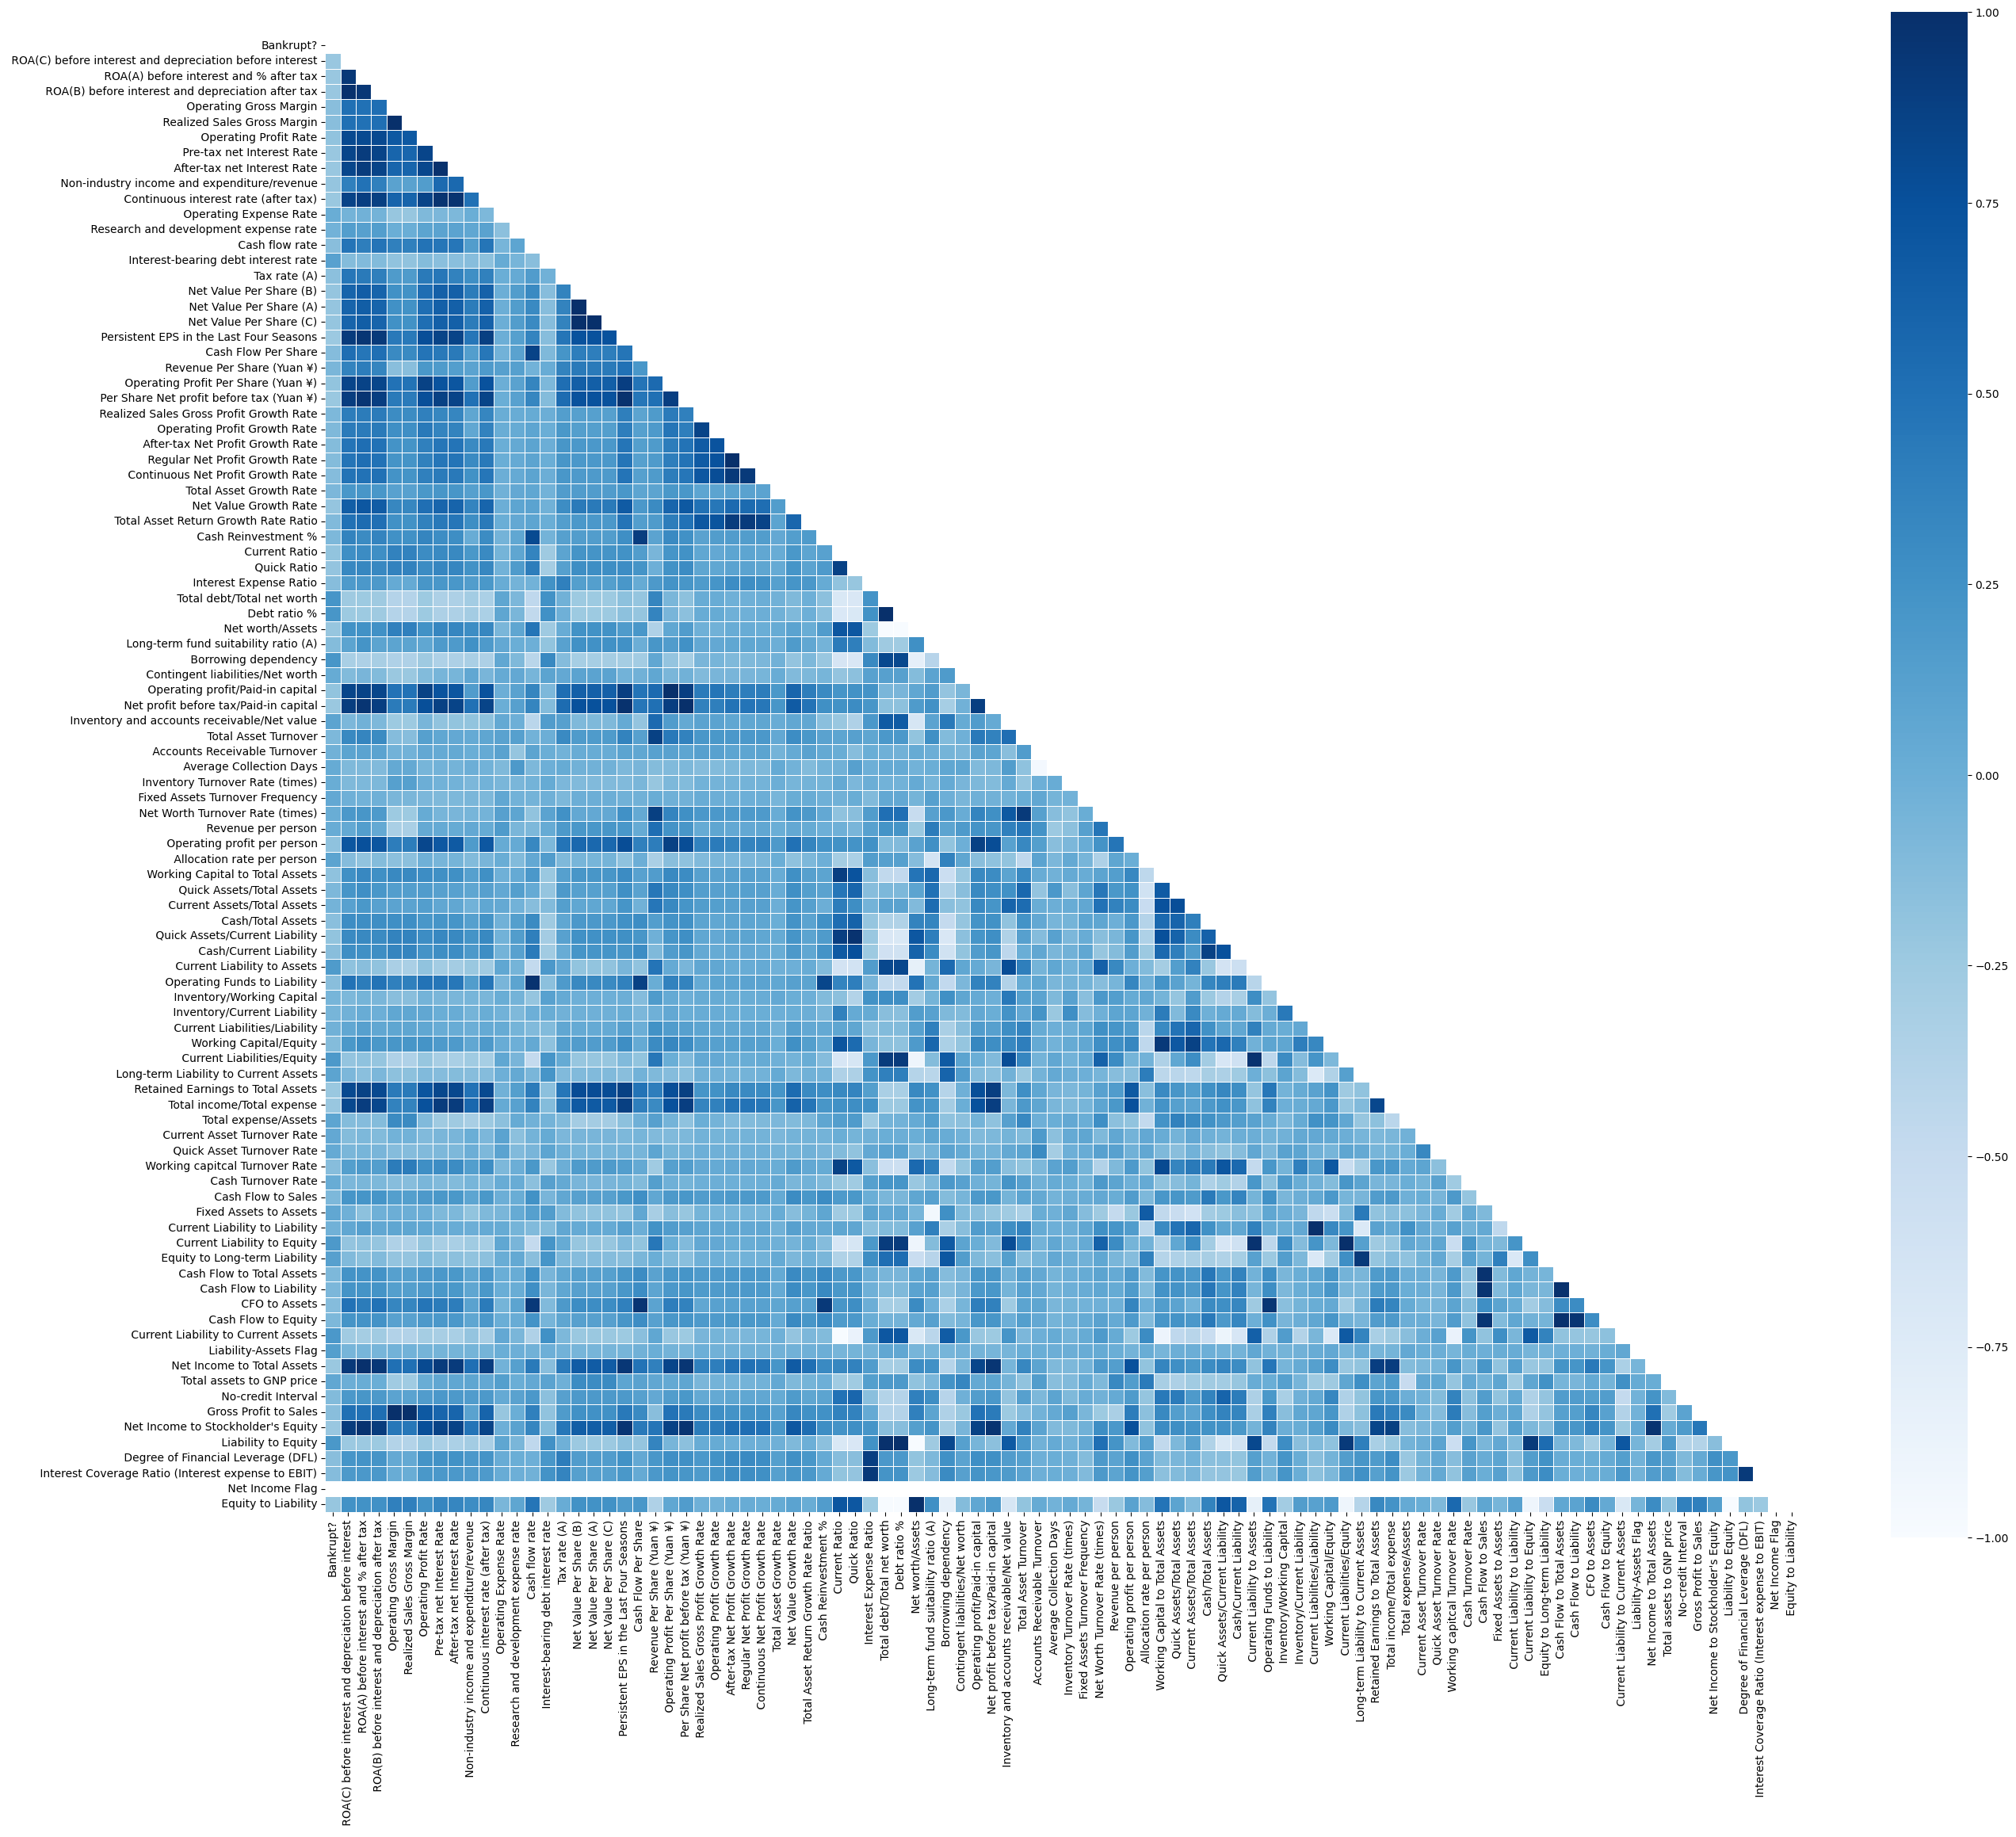

In [28]:
# plt.figure(figsize=(30,25))
f, ax = plt.subplots(figsize=(30, 25))
mat = data.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap="Blues"
sns.heatmap(mat, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, annot=False)

In [29]:
data.corr('spearman')[abs(data.corr('spearman')) >= 0.7]

Bankrupt?  \
Bankrupt?                                                 1.0   
 ROA(C) before interest and depreciation before...        NaN   
 ROA(A) before interest and % after tax                   NaN   
 ROA(B) before interest and depreciation after tax        NaN   
 Operating Gross Margin                                   NaN   
 Realized Sales Gross Margin                              NaN   
 Operating Profit Rate                                    NaN   
 Pre-tax net Interest Rate                                NaN   
 After-tax net Interest Rate                              NaN   
 Non-industry income and expenditure/revenue              NaN   
 Continuous interest rate (after tax)                     NaN   
 Operating Expense Rate                                   NaN   
 Research and development expense rate                    NaN   
 Cash flow rate                                           NaN   
 Interest-bearing debt interest rate                      NaN   
 Tax rate (A)                                             NaN   
 Net Value Per Share (B)                                  NaN   
 Net Value Per Share (A)                                  NaN   
 Net Value Per Share (C)                                  NaN   
 Persistent EPS in the Last Four Seasons                  NaN   
 Cash Flow Per Share                                      NaN   
 Revenue Per Share (Yuan ¥)                               NaN   
 Operating Profit Per Share (Yuan ¥)                      NaN   
 Per Share Net profit before tax (Yuan ¥)                 NaN   
 Realized Sales Gross Profit Growth Rate                  NaN   
 Operating Profit Growth Rate                             NaN   
 After-tax Net Profit Growth Rate                         NaN   
 Regular Net Profit Growth Rate                           NaN   
 Continuous Net Profit Growth Rate                        NaN   
 Total Asset Growth Rate                                  NaN   
 Net Value Growth Rate                                    NaN   
 Total Asset Return Growth Rate Ratio                     NaN   
 Cash Reinvestment %                                      NaN   
 Current Ratio                                            NaN   
 Quick Ratio                                              NaN   
 Interest Expense Ratio                                   NaN   
 Total debt/Total net worth                               NaN   
 Debt ratio %                                             NaN   
 Net worth/Assets                                         NaN   
 Long-term fund suitability ratio (A)                     NaN   
 Borrowing dependency                                     NaN   
 Contingent liabilities/Net worth                         NaN   
 Operating profit/Paid-in capital                         NaN   
 Net profit before tax/Paid-in capital                    NaN   
 Inventory and accounts receivable/Net value              NaN   
 Total Asset Turnover                                     NaN   
 Accounts Receivable Turnover                             NaN   
 Average Collection Days                                  NaN   
 Inventory Turnover Rate (times)                          NaN   
 Fixed Assets Turnover Frequency                          NaN   
 Net Worth Turnover Rate (times)                          NaN   
 Revenue per person                                       NaN   
 Operating profit per person                              NaN   
 Allocation rate per person                               NaN   
 Working Capital to Total Assets                          NaN   
 Quick Assets/Total Assets                                NaN   
 Current Assets/Total Assets                              NaN   
 Cash/Total Assets                                        NaN   
 Quick Assets/Current Liability                           NaN   
 Cash/Current Liability                                   NaN   
 Current Liability to Assets                              NaN   
 Operating Funds to Li

<Axes: >

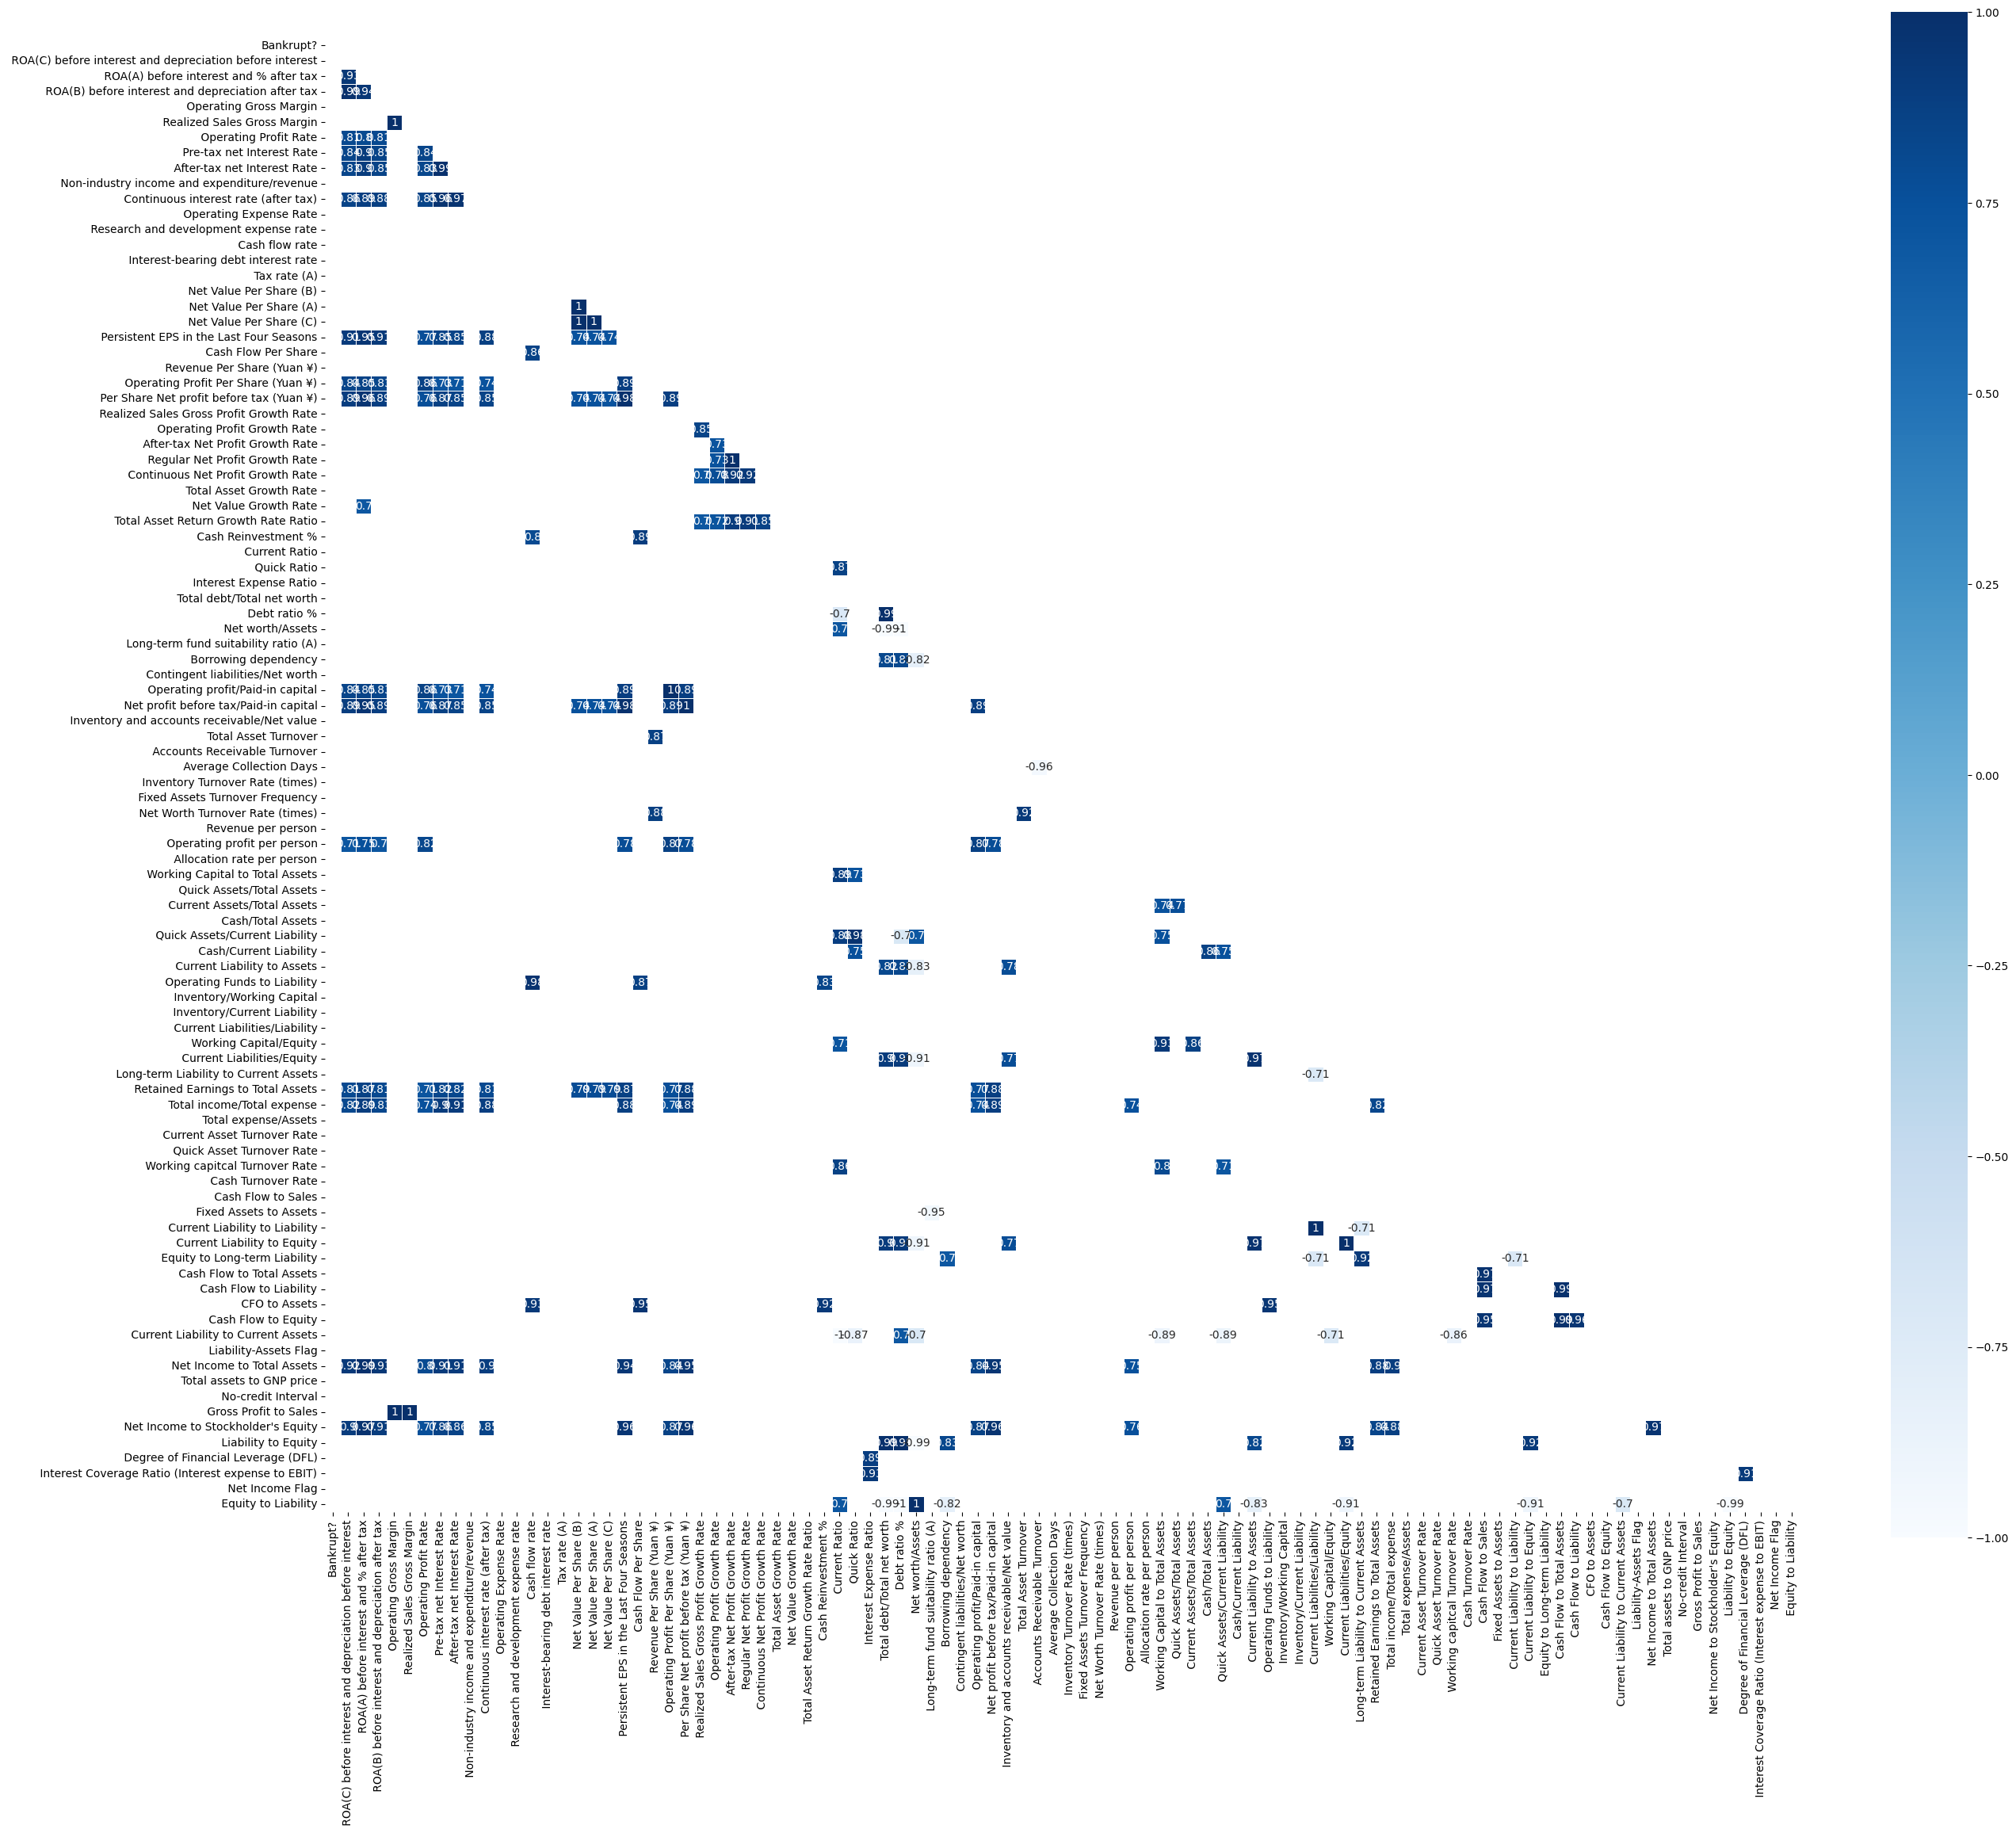

In [30]:
# Strong Correlation Matrix
f, ax = plt.subplots(figsize=(30, 25))
mat = data.corr('spearman')[abs(data.corr('spearman')) >= 0.7]
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap="Blues"
sns.heatmap(mat, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, annot=True)

# 3 Data Preprocessing (before sampling / splitting)


## 3.1.1 Outlier Transformation (fixing apparent data input error)

### Solution to the Outlier Problem :
As described in Section 2.3, any data larger than 1 must be error input. Therefore, I used slicing and transformation to solve the apparent data input error.

In [31]:
index_outlier = data > 1 #create index matrix using filter ">1"

data[index_outlier] = data[index_outlier] / 10000000000  #create the transformed dataset



## 3.1.2 Remove the Features with **Zero Variance** (Filter-based Feature Selection)
A common Filter-based Feature Selection method is "variance filter".

I used "VarianceThreshold" function of sklearn to filter out Zero Variance columns, because they offer **no infomational value** and should be removed across the whole dataset even before any sampling treatment.

Conclusion: the zero-var variables are:  [' Net Income Flag']

In [32]:
from sklearn.feature_selection import VarianceThreshold

var_filter_zero = VarianceThreshold(threshold = 0)
var_filter_zero.fit(data)
zero_var_features=data.columns[~var_filter_zero.get_support()] # who are the zero-var feature?
#var_filter_zero.get_support()
#var_filter_zero.get_feature_names_out()

In [33]:
print("the zero-var variables are: ", zero_var_features.values)

the zero-var variables are:  [' Net Income Flag']


In [34]:
# Drop the zero_var_features
data_preprocessed = data.drop(zero_var_features, axis=1)

In [35]:
# Transform the dataset and save to new dataset
# Will cause the data type to change - why?

#var_filter_zero.set_output(transform="pandas")
#data_preprocessed = var_filter_zero.transform(data)

In [36]:
print("the new dimension of the dataset is:", data_preprocessed.shape)

the new dimension of the dataset is: (6819, 95)


## 3.1.3 Data Type Conversion

As described in Section 2, "int64" type is actually categorical variable. I will use ".astype" method to do the conversion

In [37]:
Categorical_variables = data_preprocessed.select_dtypes(include=['int64']).columns

In [38]:
data_preprocessed[Categorical_variables] = data_preprocessed[Categorical_variables].astype('category')

In [39]:
# check the new dtypes
data_preprocessed.dtypes

Bankrupt?                                                   category
 ROA(C) before interest and depreciation before interest     float64
 ROA(A) before interest and % after tax                      float64
 ROA(B) before interest and depreciation after tax           float64
 Operating Gross Margin                                      float64
 Realized Sales Gross Margin                                 float64
 Operating Profit Rate                                       float64
 Pre-tax net Interest Rate                                   float64
 After-tax net Interest Rate                                 float64
 Non-industry income and expenditure/revenue                 float64
 Continuous interest rate (after tax)                        float64
 Operating Expense Rate                                      float64
 Research and development expense rate                       float64
 Cash flow rate                                              float64
 Interest-bearing debt interest ra

In [40]:
# Look at one example
data_preprocessed[Categorical_variables[1]]

0       0
1       0
2       0
3       0
4       0
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name:  Liability-Assets Flag, Length: 6819, dtype: category
Categories (2, int64): [0, 1]

## 3.2 Data Normalization

As described in Section 2.3, the author already scaled the data to [0,1] range.

After outlier transformation and dropping zero-var variables, we can see from both the descriptive stat table and the boxplot table that all the data are now in [0,1] range.

In [41]:
data_preprocessed.describe().T

count      mean  \
 ROA(C) before interest and depreciation before...  6819.0  0.505180   
 ROA(A) before interest and % after tax             6819.0  0.558625   
 ROA(B) before interest and depreciation after tax  6819.0  0.553589   
 Operating Gross Margin                             6819.0  0.607948   
 Realized Sales Gross Margin                        6819.0  0.607929   
 Operating Profit Rate                              6819.0  0.998755   
 Pre-tax net Interest Rate                          6819.0  0.797190   
 After-tax net Interest Rate                        6819.0  0.809084   
 Non-industry income and expenditure/revenue        6819.0  0.303623   
 Continuous interest rate (after tax)               6819.0  0.781381   
 Operating Expense Rate                             6819.0  0.199957   
 Research and development expense rate              6819.0  0.195266   
 Cash flow rate                                     6819.0  0.467431   
 Interest-bearing debt interest rate                6819.0  0.002469   
 Tax rate (A)                                       6819.0  0.115001   
 Net Value Per Share (B)                            6819.0  0.190661   
 Net Value Per Share (A)                            6819.0  0.190633   
 Net Value Per Share (C)                            6819.0  0.190672   
 Persistent EPS in the Last Four Seasons            6819.0  0.228813   
 Cash Flow Per Share                                6819.0  0.323482   
 Revenue Per Share (Yuan ¥)                         6819.0  0.039097   
 Operating Profit Per Share (Yuan ¥)                6819.0  0.109091   
 Per Share Net profit before tax (Yuan ¥)           6819.0  0.184361   
 Realized Sales Gross Profit Growth Rate            6819.0  0.022408   
 Operating Profit Growth Rate                       6819.0  0.847980   
 After-tax Net Profit Growth Rate                   6819.0  0.689146   
 Regular Net Profit Growth Rate                     6819.0  0.689150   
 Continuous Net Profit Growth Rate                  6819.0  0.217639   
 Total Asset Growth Rate                            6819.0  0.550989   
 Net Value Growth Rate                              6819.0  0.000844   
 Total Asset Return Growth Rate Ratio               6819.0  0.264248   
 Cash Reinvestment %                                6819.0  0.379677   
 Current Ratio                                      6819.0  0.015145   
 Quick Ratio                                        6819.0  0.011900   
 Interest Expense Ratio                             6819.0  0.630991   
 Total debt/Total net worth                         6819.0  0.008439   
 Debt ratio %                                       6819.0  0.113177   
 Net worth/Assets                                   6819.0  0.886823   
 Long-term fund suitability ratio (A)               6819.0  0.008783   
 Borrowing dependency                               6819.0  0.374654   
 Contingent liabilities/Net worth                   6819.0  0.005968   
 Operating profit/Paid-in capital                   6819.0  0.108977   
 Net profit before tax/Paid-in capital              6819.0  0.182715   
 Inventory and accounts receivable/Net value        6819.0  0.402459   
 Total Asset Turnover                               6819.0  0.141606   
 Accounts Receivable Turnover                       6819.0  0.003461   
 Average Collection Days                            6819.0  0.008677   
 Inventory Turnover Rate (times)                    6819.0  0.215989   
 Fixed Assets Turnover Frequency                    6819.0  0.102860   
 Net Worth Turnover Rate (times)                    6819.0  0.038595   
 Revenue per person                                 6819.0  0.035765   
 Operating profit per person                        6819.0  0.400671   
 Allocation rate per person                         6819.0  0.017104   
 Working Capital to Total Assets                    6819.0  0.814125   
 Quick Assets/Total Assets                          6819.0  0.400132   
 Current Assets/Total

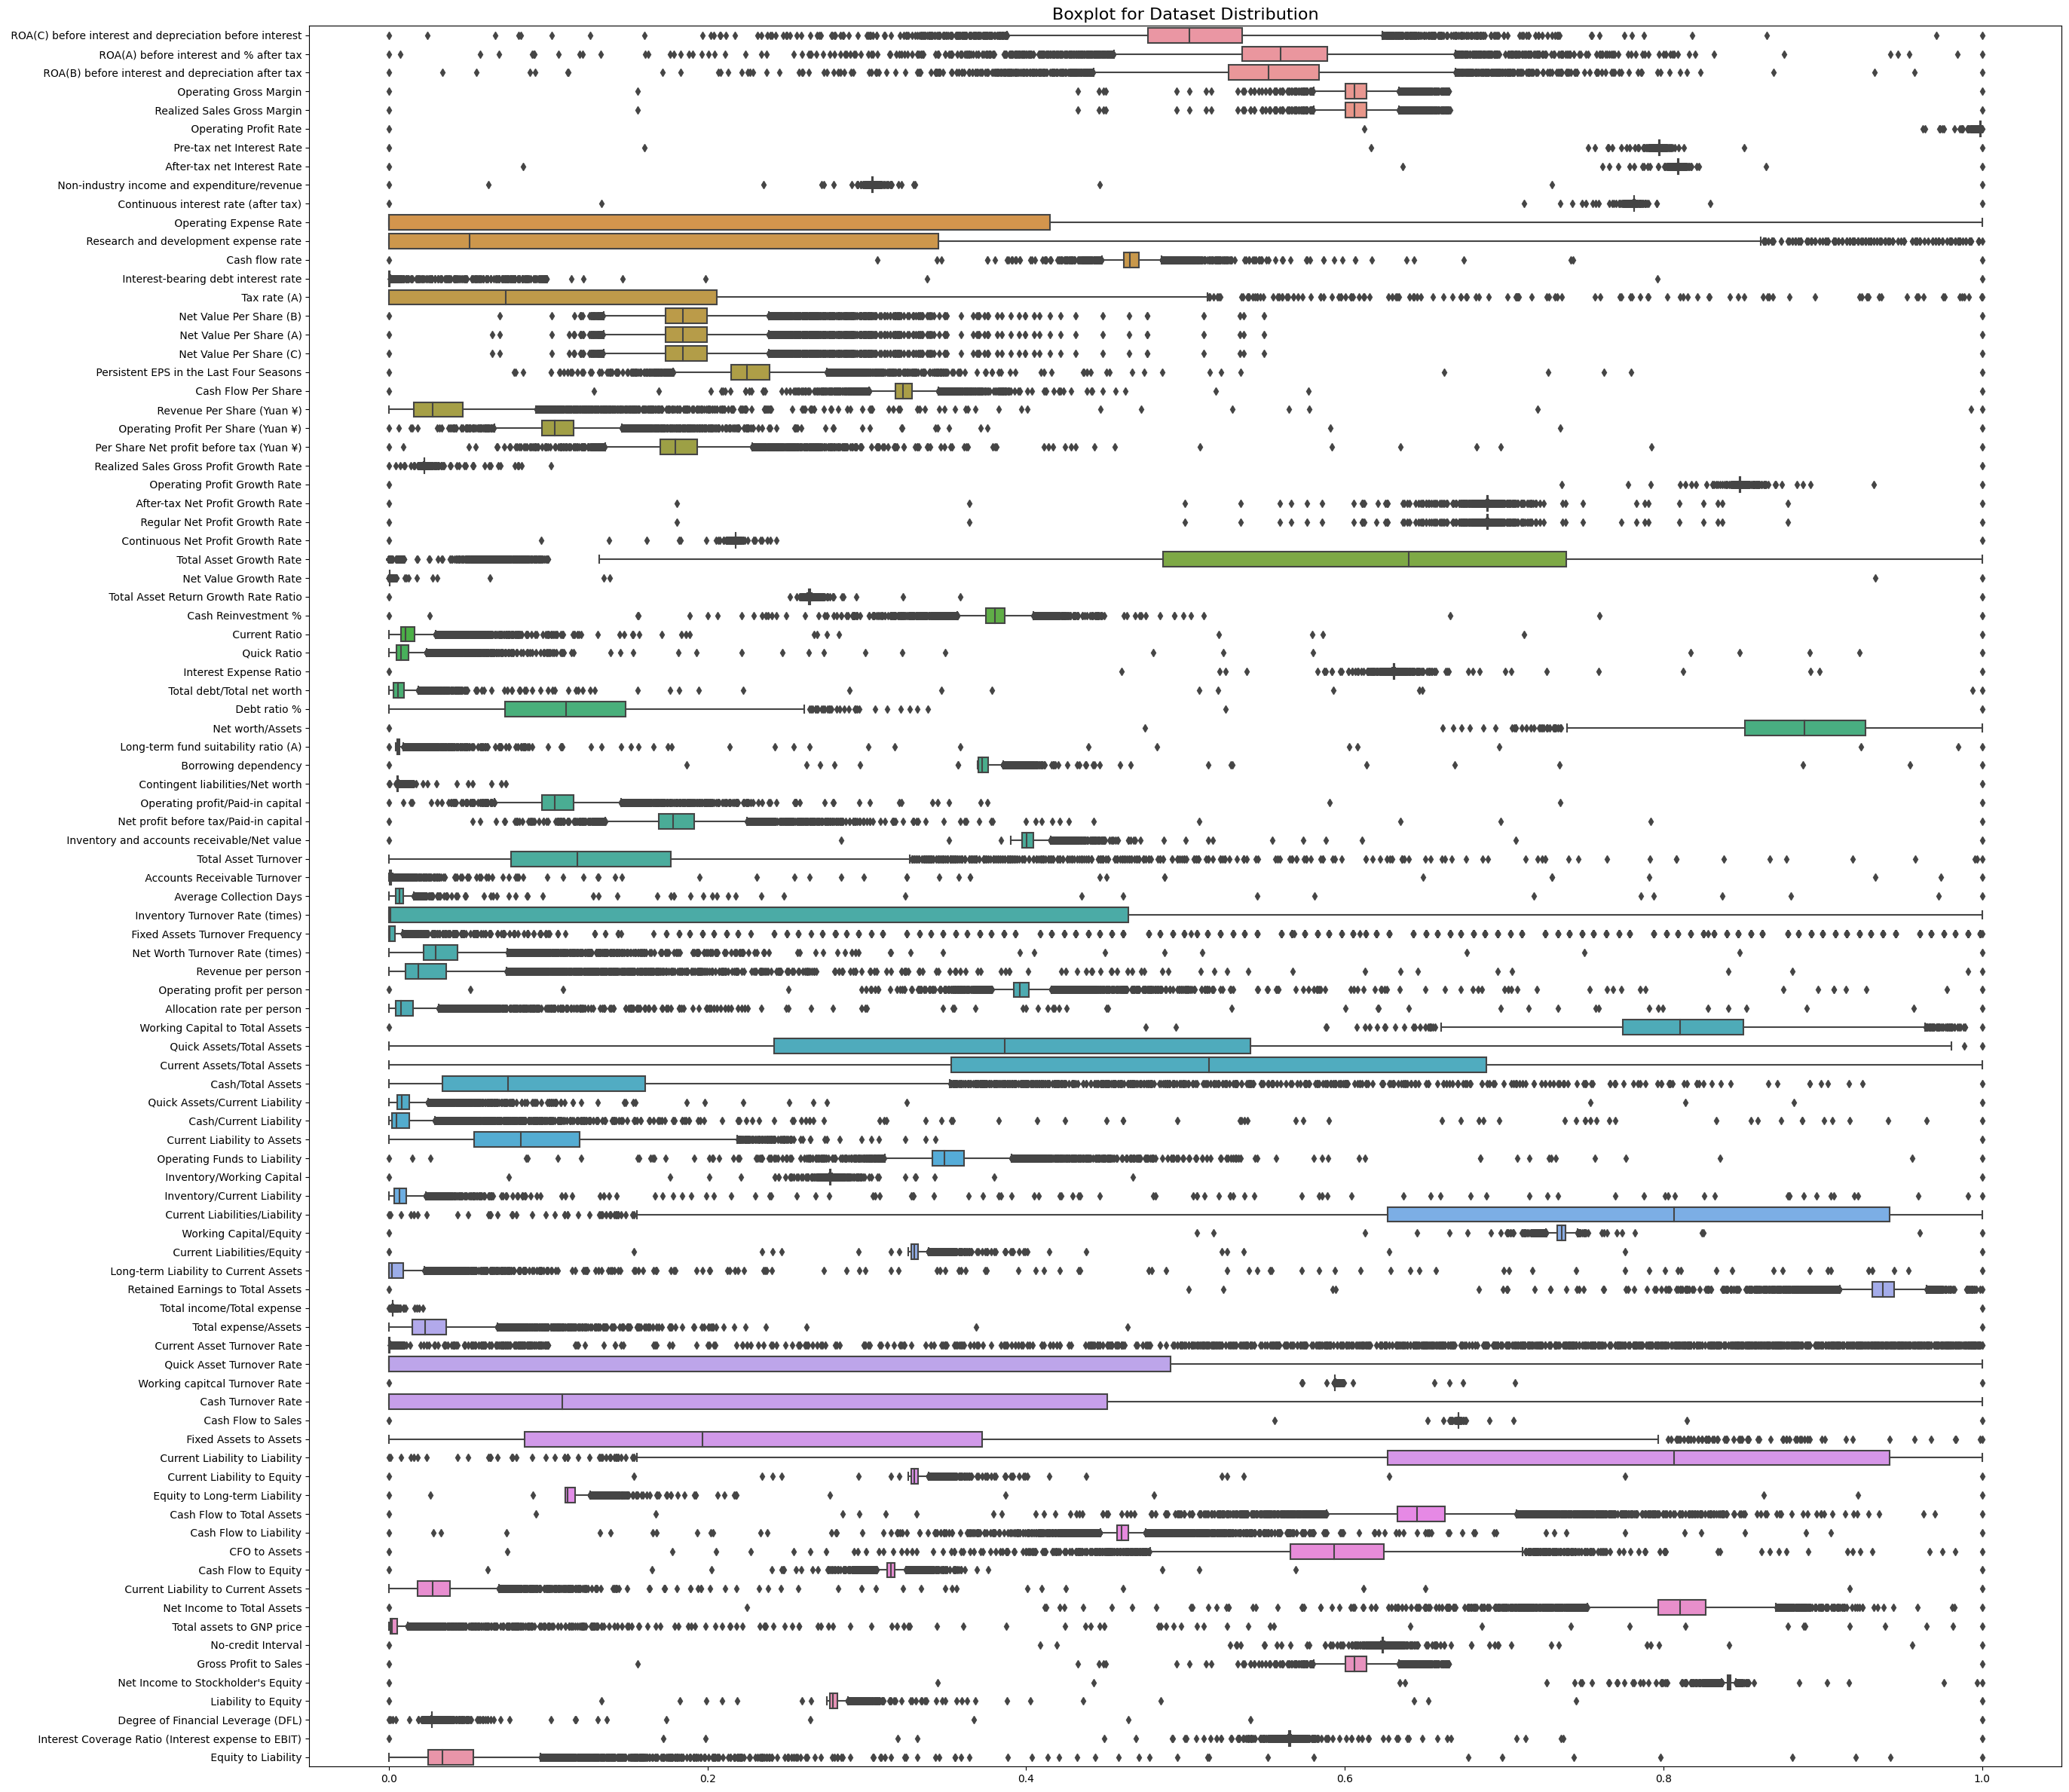

In [42]:
# Visualization: Boxplots
plt.figure(figsize = (30,30))
ax = sns.boxplot(data = data_preprocessed, orient="h") #change the orientation to horizontal
ax.set_title('Boxplot for Dataset Distribution', fontsize = 16)
#ax.set(xscale="log")
plt.show()

# 4 Constructing the Pipeline




## 4.0 Preparation works

### 4.0.1 Spliting target variable and independent variable set

In [43]:
# Splitting X and Y
y = data_preprocessed['Bankrupt?']
X = data_preprocessed.drop(['Bankrupt?'], axis = 1)
print("Dimension of Y is:", y.shape)
print("Dimension of X is:", X.shape)

Dimension of Y is: (6819,)
Dimension of X is: (6819, 94)


### 4.0.2 Construct Parameter set for the pipelines (feature selection / sampling / classifier algos)

In [44]:
# Sampling - SMOTE
over_sampling_smote = SMOTE()

# SMOTE-NC has some bugs...
# Categorical_variables_X = X.select_dtypes(include=['category']).columns
# over_sampling_smotenc = SMOTENC(categorical_features= Categorical_variables_X)

In [45]:
# Classifiers
classifier_KNN = KNeighborsClassifier(n_neighbors = 5) # 5 neighbors is the default setting
classifier_NB = GaussianNB() # The likelihood of the features is assumed to be Gaussian, which is the best in this case
classifier_LR = LogisticRegression(max_iter = 10000) # "max_iter" default = 100
classifier_DT = DecisionTreeClassifier(max_features = 30)  # "max_features" is in line with KBest's K value

In [46]:
# Feature Selection
Best_K = 30
feature_selection_KBest30 = SelectKBest(mutual_info_classif, k = Best_K)

# n_features_to_select = Best_K is to let feature number align with K-best algo
feature_selection_RFE30_LR = RFE(classifier_LR, n_features_to_select = Best_K)


## 4.1 Pipeline Series - KNN

### 4.1.1 Pipeline KBest - SMOTE - KNN
This pipeline will do the following:
- Filter-based feature selection using Mutual Infomation, selecting 30 best variables
- Oversampling using SMOTE technique, using default settings
- build a KNN classifier, where Number_of_Neighbors = 5

In [47]:
# Pipeline

pipeline_KBest30_SMOTE_KNN = imbalanced_pipeline([
    ('feature_selection', feature_selection_KBest30),
    ('SMOTE', over_sampling_smote),
     ('classification', classifier_KNN)
    ])

# pipeline_KBest30_SMOTE_KNN = imbalanced_pipeline([
#    ('feature_selection', feature_selection_KBest30),
#    ('SMOTE-NC', over_sampling_smotenc),
#     ('classification', classifier_KNN5)
#    ])

### 4.1.2 Pipeline RFE - SMOTE - KNN
This pipeline will do the following:
- Wrapper-based feature selection using recursive feature elimination (RFE) , selecting 30 best variables
- Oversampling using SMOTE technique, using default settings
- build a KNN classifier, where Number_of_Neighbors = 5

In [48]:
# Pipeline

pipeline_RFE30_SMOTE_KNN = imbalanced_pipeline([
    ('feature_selection', feature_selection_RFE30_LR),
    ('SMOTE', over_sampling_smote),
     ('classification', classifier_KNN)
    ])

# pipeline_KBest30_SMOTE_KNN = imbalanced_pipeline([
#    ('feature_selection', feature_selection_KBest30),
#    ('SMOTE-NC', over_sampling_smotenc),
#     ('classification', classifier_KNN5)
#    ])

## 4.2 Pipeline Series - Naive Bayes (NB)

### 4.2.1 Pipeline KBest - SMOTE - NB
This pipeline will do the following:
- Filter-based feature selection using Mutual Infomation, selecting 30 best variables
- Oversampling using SMOTE technique, using default settings
- build a Gaussian NB classifier, using all default settings

In [49]:
# Pipeline

pipeline_KBest30_SMOTE_NB = imbalanced_pipeline([
    ('feature_selection', feature_selection_KBest30),
    ('SMOTE', over_sampling_smote),
     ('classification', classifier_NB)
    ])


### 4.2.2 Pipeline RFE - SMOTE - NB
This pipeline will do the following:
- Wrapper-based feature selection using recursive feature elimination (RFE) , selecting 30 best variables
- Oversampling using SMOTE technique, using default settings
- build a Gaussian NB classifier, using all default settings

In [50]:
# Pipeline

pipeline_RFE30_SMOTE_NB = imbalanced_pipeline([
    ('feature_selection', feature_selection_RFE30_LR),
    ('SMOTE', over_sampling_smote),
     ('classification', classifier_NB)
    ])


## 4.3 Pipeline Series - Logistic regression (LR)  

### 4.3.1 Pipeline KBest - SMOTE - LR
This pipeline will do the following:
- Filter-based feature selection using Mutual Infomation, selecting 30 best variables
- Oversampling using SMOTE technique, using default settings
- build a LR classifier, where maximum number of iterations allowed is 10000

In [51]:
# Pipeline

pipeline_KBest30_SMOTE_LR = imbalanced_pipeline([
    ('feature_selection', feature_selection_KBest30),
    ('SMOTE', over_sampling_smote),
     ('classification', classifier_LR)
    ])

### 4.3.2 Pipeline RFE - SMOTE - LR
This pipeline will do the following:
- Wrapper-based feature selection using recursive feature elimination (RFE) , selecting 30 best variables
- Oversampling using SMOTE technique, using default settings
- build a LR classifier, where maximum number of iterations allowed is 10000

In [52]:
# Pipeline

pipeline_RFE30_SMOTE_LR = imbalanced_pipeline([
    ('feature_selection', feature_selection_RFE30_LR),
    ('SMOTE', over_sampling_smote),
     ('classification', classifier_LR)
    ])

## 4.4 Pipeline Series - Decision Tree (DT)

### 4.1.1 Pipeline SMOTE - KNNImputer - DT

This pipeline will do the following:
- Oversampling using SMOTE technique, using default settings
- Use KNNImputer to fill missing values, using default settings
- build a DT classifier, where maximum features allowed is 30

In [53]:
# Pipeline

pipeline_SMOTE_KNNImputer_DT = imbalanced_pipeline([
     ('SMOTE', over_sampling_smote),
     ('imputer', KNNImputer()),
     ('classification', classifier_DT)
    ])

### 4.1.2 Pipeline (direct) DT

This is a placeholder where no pipeline is actually required.

SMOTE is not used here, which serves as contrast to SMOTE-KNNImputer-DT pipeline

# 5 Evaluation of Models


I used "Cross Validation" function from Sklearn package to perform K-fold CV.

In stage 4 (constructing pipeline), I did not manipulate the data in anyway. The CV algo in this step will the splitting of Train/Test set BEFORE training the model, which will ensure that none of the data in the testing set is "leaked" to the testing set.

## 5.0 Parameter set

Note: There are 6k+ rows, therefore I use 6-fold as a variation to the default of 5-fold

In [54]:
# Scoring factors
scoring = ['accuracy','precision','recall','f1','matthews_corrcoef','neg_brier_score','roc_auc']
# Folds of CV
validation_folds = 6



In [55]:
# Scorer Names

sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

## 5.1 Model Result: KNN

### 5.1.1 KBest - SMOTE - KNN

In [56]:
# KBest - SMOTE - KNN:

# Set parameters
Classifier = pipeline_KBest30_SMOTE_KNN

# Start tracking
tracemalloc.start()
# Run the CV algo
CV_Result = cross_validate(Classifier, X, y, cv=validation_folds, scoring=scoring, error_score='raise')
# Record memory usage
current_usage, peak_usage = tracemalloc.get_traced_memory()
# Stop memory tracking
tracemalloc.stop()

# Calc the avg
accuracy_avg = CV_Result['test_accuracy'].mean()
precision_avg = CV_Result['test_precision'].mean()
recall_avg = CV_Result['test_recall'].mean()
f1_avg = CV_Result['test_f1'].mean()
matthews_corrcoef_avg = CV_Result['test_matthews_corrcoef'].mean()
neg_brier_score_avg = CV_Result['test_neg_brier_score'].mean()
roc_auc_score_avg = CV_Result['test_roc_auc'].mean()
fit_times_avg = CV_Result['fit_time'].mean()
peak_memory_usage = peak_usage / 1024**2

# Ref: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


# Generate Dict
Dict_KBest30_SMOTE_KNN = {
    'Accuracy': accuracy_avg,
    'Precision': precision_avg,
    'Recall': recall_avg,
    'F1 Score': f1_avg,
    # harmonic mean of the precision and recall
    'Matthews correlation coefficient (MCC)': matthews_corrcoef_avg,
    'Brier Score Loss': neg_brier_score_avg,
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html#sklearn.metrics.brier_score_loss
    'ROC AUC': roc_auc_score_avg,
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
    'Time Consumption': fit_times_avg,
    'Peak Memory Usage': peak_memory_usage,
    }

print(f"Current/peak memory usage in Megabytes(MB):{current_usage / 1024**2:.2f}, {peak_usage / 1024**2:.2f}")
print(Dict_KBest30_SMOTE_KNN)



Current/peak memory usage in Megabytes(MB):0.59, 26.26
{'Accuracy': 0.8803474983586655, 'Precision': 0.16560264040636477, 'Recall': 0.6188688688688689, 'F1 Score': 0.25815723423257236, 'Matthews correlation coefficient (MCC)': 0.27563038473233287, 'Brier Score Loss': -0.09245506976187233, 'ROC AUC': 0.8015183071751544, 'Time Consumption': 3.283099134763082, 'Peak Memory Usage': 26.25771427154541}


### 5.1.1 RFE - SMOTE - KNN

In [57]:
# RFE - SMOTE - KNN:

# Set parameters
Classifier = pipeline_RFE30_SMOTE_KNN

# Start tracking
tracemalloc.start()
# Run the CV algo
CV_Result = cross_validate(Classifier, X, y, cv=validation_folds, scoring=scoring, error_score='raise')
# Record memory usage
current_usage, peak_usage = tracemalloc.get_traced_memory()
# Stop memory tracking
tracemalloc.stop()

# Calc the avg
accuracy_avg = CV_Result['test_accuracy'].mean()
precision_avg = CV_Result['test_precision'].mean()
recall_avg = CV_Result['test_recall'].mean()
f1_avg = CV_Result['test_f1'].mean()
matthews_corrcoef_avg = CV_Result['test_matthews_corrcoef'].mean()
neg_brier_score_avg = CV_Result['test_neg_brier_score'].mean()
roc_auc_score_avg = CV_Result['test_roc_auc'].mean()
fit_times_avg = CV_Result['fit_time'].mean()
peak_memory_usage = peak_usage / 1024**2

# Ref: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


# Generate Dict
Dict_RFE30_SMOTE_KNN = {
    'Accuracy': accuracy_avg,
    'Precision': precision_avg,
    'Recall': recall_avg,
    'F1 Score': f1_avg,
    # harmonic mean of the precision and recall
    'Matthews correlation coefficient (MCC)': matthews_corrcoef_avg,
    'Brier Score Loss': neg_brier_score_avg,
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html#sklearn.metrics.brier_score_loss
    'ROC AUC': roc_auc_score_avg,
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
    'Time Consumption': fit_times_avg,
    'Peak Memory Usage': peak_memory_usage,
    }

print(f"Current/peak memory usage in Megabytes(MB):{current_usage / 1024**2:.2f}, {peak_usage / 1024**2:.2f}")
print(Dict_RFE30_SMOTE_KNN)



Current/peak memory usage in Megabytes(MB):12.96, 70.48
{'Accuracy': 0.8810844213625346, 'Precision': 0.18171853241179847, 'Recall': 0.6636636636636638, 'F1 Score': 0.2806594884844147, 'Matthews correlation coefficient (MCC)': 0.30299983428383676, 'Brier Score Loss': -0.0931320737382371, 'ROC AUC': 0.8252383248083887, 'Time Consumption': 11.726410587628683, 'Peak Memory Usage': 70.47739791870117}


## 5.2 Model Result: NB

### 5.2.1 KBest - SMOTE - NB

In [58]:
# KBest - SMOTE - NB:

# Set parameters
Classifier = pipeline_KBest30_SMOTE_NB

# Start tracking
tracemalloc.start()
# Run the CV algo
CV_Result = cross_validate(Classifier, X, y, cv=validation_folds, scoring=scoring, error_score='raise')
# Record memory usage
current_usage, peak_usage = tracemalloc.get_traced_memory()
# Stop memory tracking
tracemalloc.stop()

# Calc the avg
accuracy_avg = CV_Result['test_accuracy'].mean()
precision_avg = CV_Result['test_precision'].mean()
recall_avg = CV_Result['test_recall'].mean()
f1_avg = CV_Result['test_f1'].mean()
matthews_corrcoef_avg = CV_Result['test_matthews_corrcoef'].mean()
neg_brier_score_avg = CV_Result['test_neg_brier_score'].mean()
roc_auc_score_avg = CV_Result['test_roc_auc'].mean()
fit_times_avg = CV_Result['fit_time'].mean()
peak_memory_usage = peak_usage / 1024**2

# Ref: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


# Generate Dict
Dict_KBest30_SMOTE_NB = {
    'Accuracy': accuracy_avg,
    'Precision': precision_avg,
    'Recall': recall_avg,
    'F1 Score': f1_avg,
    # harmonic mean of the precision and recall
    'Matthews correlation coefficient (MCC)': matthews_corrcoef_avg,
    'Brier Score Loss': neg_brier_score_avg,
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html#sklearn.metrics.brier_score_loss
    'ROC AUC': roc_auc_score_avg,
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
    'Time Consumption': fit_times_avg,
    'Peak Memory Usage': peak_memory_usage,
    }

print(f"Current/peak memory usage in Megabytes(MB):{current_usage / 1024**2:.2f}, {peak_usage / 1024**2:.2f}")
print(Dict_KBest30_SMOTE_NB)



Current/peak memory usage in Megabytes(MB):0.13, 25.81
{'Accuracy': 0.8095286944475412, 'Precision': 0.1403272112344751, 'Recall': 0.7777777777777777, 'F1 Score': 0.23252976253896918, 'Matthews correlation coefficient (MCC)': 0.27453920213715416, 'Brier Score Loss': -0.1723632133216609, 'ROC AUC': 0.8651960190296178, 'Time Consumption': 3.0172460079193115, 'Peak Memory Usage': 25.8120698928833}


### 5.2.2 RFE - SMOTE - NB

In [59]:
# RFE - SMOTE - NB:

# Set parameters
Classifier = pipeline_RFE30_SMOTE_NB

# Start tracking
tracemalloc.start()
# Run the CV algo
CV_Result = cross_validate(Classifier, X, y, cv=validation_folds, scoring=scoring, error_score='raise')
# Record memory usage
current_usage, peak_usage = tracemalloc.get_traced_memory()
# Stop memory tracking
tracemalloc.stop()

# Calc the avg
accuracy_avg = CV_Result['test_accuracy'].mean()
precision_avg = CV_Result['test_precision'].mean()
recall_avg = CV_Result['test_recall'].mean()
f1_avg = CV_Result['test_f1'].mean()
matthews_corrcoef_avg = CV_Result['test_matthews_corrcoef'].mean()
neg_brier_score_avg = CV_Result['test_neg_brier_score'].mean()
roc_auc_score_avg = CV_Result['test_roc_auc'].mean()
fit_times_avg = CV_Result['fit_time'].mean()
peak_memory_usage = peak_usage / 1024**2

# Ref: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


# Generate Dict
Dict_RFE30_SMOTE_NB = {
    'Accuracy': accuracy_avg,
    'Precision': precision_avg,
    'Recall': recall_avg,
    'F1 Score': f1_avg,
    # harmonic mean of the precision and recall
    'Matthews correlation coefficient (MCC)': matthews_corrcoef_avg,
    'Brier Score Loss': neg_brier_score_avg,
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html#sklearn.metrics.brier_score_loss
    'ROC AUC': roc_auc_score_avg,
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
    'Time Consumption': fit_times_avg,
    'Peak Memory Usage': peak_memory_usage,
    }

print(f"Current/peak memory usage in Megabytes(MB):{current_usage / 1024**2:.2f}, {peak_usage / 1024**2:.2f}")
print(Dict_RFE30_SMOTE_NB)



Current/peak memory usage in Megabytes(MB):23.32, 66.71
{'Accuracy': 0.8577623760740934, 'Precision': 0.16378104426001802, 'Recall': 0.7822822822822824, 'F1 Score': 0.2689792359458667, 'Matthews correlation coefficient (MCC)': 0.31483866155717627, 'Brier Score Loss': -0.13150154208795578, 'ROC AUC': 0.8925719442041098, 'Time Consumption': 10.763522307078043, 'Peak Memory Usage': 66.70786380767822}


## 5.3 Model Result: LR

### 5.3.1 KBest - SMOTE - LR

In [60]:
# KBest - SMOTE - LR:

# Set parameters
Classifier = pipeline_KBest30_SMOTE_LR

# Start tracking
tracemalloc.start()
# Run the CV algo
CV_Result = cross_validate(Classifier, X, y, cv=validation_folds, scoring=scoring, error_score='raise')
# Record memory usage
current_usage, peak_usage = tracemalloc.get_traced_memory()
# Stop memory tracking
tracemalloc.stop()

# Calc the avg
accuracy_avg = CV_Result['test_accuracy'].mean()
precision_avg = CV_Result['test_precision'].mean()
recall_avg = CV_Result['test_recall'].mean()
f1_avg = CV_Result['test_f1'].mean()
matthews_corrcoef_avg = CV_Result['test_matthews_corrcoef'].mean()
neg_brier_score_avg = CV_Result['test_neg_brier_score'].mean()
roc_auc_score_avg = CV_Result['test_roc_auc'].mean()
fit_times_avg = CV_Result['fit_time'].mean()
peak_memory_usage = peak_usage / 1024**2

# Ref: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


# Generate Dict
Dict_KBest30_SMOTE_LR = {
    'Accuracy': accuracy_avg,
    'Precision': precision_avg,
    'Recall': recall_avg,
    'F1 Score': f1_avg,
    # harmonic mean of the precision and recall
    'Matthews correlation coefficient (MCC)': matthews_corrcoef_avg,
    'Brier Score Loss': neg_brier_score_avg,
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html#sklearn.metrics.brier_score_loss
    'ROC AUC': roc_auc_score_avg,
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
    'Time Consumption': fit_times_avg,
    'Peak Memory Usage': peak_memory_usage,
    }

print(f"Current/peak memory usage in Megabytes(MB):{current_usage / 1024**2:.2f}, {peak_usage / 1024**2:.2f}")
print(Dict_KBest30_SMOTE_LR)



Current/peak memory usage in Megabytes(MB):2.90, 28.58
{'Accuracy': 0.8548371362741088, 'Precision': 0.18018196169589196, 'Recall': 0.8455955955955957, 'F1 Score': 0.29411770027830925, 'Matthews correlation coefficient (MCC)': 0.34746200133311067, 'Brier Score Loss': -0.10731730680796768, 'ROC AUC': 0.9180220186271141, 'Time Consumption': 3.40096386273702, 'Peak Memory Usage': 28.576544761657715}


### 5.3.2 RFE - SMOTE - LR

In [61]:
# RFE - SMOTE - LR:

# Set parameters
Classifier = pipeline_RFE30_SMOTE_LR

# Start tracking
tracemalloc.start()
# Run the CV algo
CV_Result = cross_validate(Classifier, X, y, cv=validation_folds, scoring=scoring, error_score='raise')
# Record memory usage
current_usage, peak_usage = tracemalloc.get_traced_memory()
# Stop memory tracking
tracemalloc.stop()

# Calc the avg
accuracy_avg = CV_Result['test_accuracy'].mean()
precision_avg = CV_Result['test_precision'].mean()
recall_avg = CV_Result['test_recall'].mean()
f1_avg = CV_Result['test_f1'].mean()
matthews_corrcoef_avg = CV_Result['test_matthews_corrcoef'].mean()
neg_brier_score_avg = CV_Result['test_neg_brier_score'].mean()
roc_auc_score_avg = CV_Result['test_roc_auc'].mean()
fit_times_avg = CV_Result['fit_time'].mean()
peak_memory_usage = peak_usage / 1024**2

# Ref: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


# Generate Dict
Dict_RFE30_SMOTE_LR = {
    'Accuracy': accuracy_avg,
    'Precision': precision_avg,
    'Recall': recall_avg,
    'F1 Score': f1_avg,
    # harmonic mean of the precision and recall
    'Matthews correlation coefficient (MCC)': matthews_corrcoef_avg,
    'Brier Score Loss': neg_brier_score_avg,
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html#sklearn.metrics.brier_score_loss
    'ROC AUC': roc_auc_score_avg,
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
    'Time Consumption': fit_times_avg,
    'Peak Memory Usage': peak_memory_usage,
    }

print(f"Current/peak memory usage in Megabytes(MB):{current_usage / 1024**2:.2f}, {peak_usage / 1024**2:.2f}")
print(Dict_RFE30_SMOTE_LR)



Current/peak memory usage in Megabytes(MB):7.38, 67.43
{'Accuracy': 0.8536683307113275, 'Precision': 0.17849394801500162, 'Recall': 0.8090590590590591, 'F1 Score': 0.2874814493767986, 'Matthews correlation coefficient (MCC)': 0.3340435477610117, 'Brier Score Loss': -0.10517791273365196, 'ROC AUC': 0.9184517696619606, 'Time Consumption': 11.065025170644125, 'Peak Memory Usage': 67.43327045440674}


## 5.4 Model Result: DT

### 5.4.1 SMOTE - KNNImputer - DT

In [62]:
# SMOTE - KNNImputer - DT:

# Set parameters
Classifier = pipeline_SMOTE_KNNImputer_DT

# Start tracking
tracemalloc.start()
# Run the CV algo
CV_Result = cross_validate(Classifier, X, y, cv=validation_folds, scoring=scoring, error_score='raise')
# Record memory usage
current_usage, peak_usage = tracemalloc.get_traced_memory()
# Stop memory tracking
tracemalloc.stop()

# Calc the avg
accuracy_avg = CV_Result['test_accuracy'].mean()
precision_avg = CV_Result['test_precision'].mean()
recall_avg = CV_Result['test_recall'].mean()
f1_avg = CV_Result['test_f1'].mean()
matthews_corrcoef_avg = CV_Result['test_matthews_corrcoef'].mean()
neg_brier_score_avg = CV_Result['test_neg_brier_score'].mean()
roc_auc_score_avg = CV_Result['test_roc_auc'].mean()
fit_times_avg = CV_Result['fit_time'].mean()
peak_memory_usage = peak_usage / 1024**2

# Ref: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


# Generate Dict
Dict_SMOTE_KNNImputer_DT = {
    'Accuracy': accuracy_avg,
    'Precision': precision_avg,
    'Recall': recall_avg,
    'F1 Score': f1_avg,
    # harmonic mean of the precision and recall
    'Matthews correlation coefficient (MCC)': matthews_corrcoef_avg,
    'Brier Score Loss': neg_brier_score_avg,
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html#sklearn.metrics.brier_score_loss
    'ROC AUC': roc_auc_score_avg,
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
    'Time Consumption': fit_times_avg,
    'Peak Memory Usage': peak_memory_usage,
    }

print(f"Current/peak memory usage in Megabytes(MB):{current_usage / 1024**2:.2f}, {peak_usage / 1024**2:.2f}")
print(Dict_SMOTE_KNNImputer_DT)

Current/peak memory usage in Megabytes(MB):0.14, 85.93
{'Accuracy': 0.9216982855797937, 'Precision': 0.19371629528353493, 'Recall': 0.4011511511511512, 'F1 Score': 0.2564817212078399, 'Matthews correlation coefficient (MCC)': 0.24058476640746998, 'Brier Score Loss': -0.07830171442020638, 'ROC AUC': 0.6701184795930019, 'Time Consumption': 1.8973543246587117, 'Peak Memory Usage': 85.93226623535156}


### 5.4.2 Direct DT

In [63]:
# Direct DT:

# Set parameters
Classifier = classifier_DT

# Start tracking
tracemalloc.start()
# Run the CV algo
CV_Result = cross_validate(Classifier, X, y, cv=validation_folds, scoring=scoring, error_score='raise')
# Record memory usage
current_usage, peak_usage = tracemalloc.get_traced_memory()
# Stop memory tracking
tracemalloc.stop()

# Calc the avg
accuracy_avg = CV_Result['test_accuracy'].mean()
precision_avg = CV_Result['test_precision'].mean()
recall_avg = CV_Result['test_recall'].mean()
f1_avg = CV_Result['test_f1'].mean()
matthews_corrcoef_avg = CV_Result['test_matthews_corrcoef'].mean()
neg_brier_score_avg = CV_Result['test_neg_brier_score'].mean()
roc_auc_score_avg = CV_Result['test_roc_auc'].mean()
fit_times_avg = CV_Result['fit_time'].mean()
peak_memory_usage = peak_usage / 1024**2

# Ref: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


# Generate Dict
Dict_DT = {
    'Accuracy': accuracy_avg,
    'Precision': precision_avg,
    'Recall': recall_avg,
    'F1 Score': f1_avg,
    # harmonic mean of the precision and recall
    'Matthews correlation coefficient (MCC)': matthews_corrcoef_avg,
    'Brier Score Loss': neg_brier_score_avg,
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html#sklearn.metrics.brier_score_loss
    'ROC AUC': roc_auc_score_avg,
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
    'Time Consumption': fit_times_avg,
    'Peak Memory Usage': peak_memory_usage,
    }

print(f"Current/peak memory usage in Megabytes(MB):{current_usage / 1024**2:.2f}, {peak_usage / 1024**2:.2f}")
print(Dict_DT)



Current/peak memory usage in Megabytes(MB):0.05, 11.34
{'Accuracy': 0.9486796548862214, 'Precision': 0.3174717019975641, 'Recall': 0.32294794794794796, 'F1 Score': 0.3121745020075935, 'Matthews correlation coefficient (MCC)': 0.29041985334975906, 'Brier Score Loss': -0.05132034511377853, 'ROC AUC': 0.6462451157833323, 'Time Consumption': 0.24033085505167642, 'Peak Memory Usage': 11.335698127746582}


# 6 Model Comparison & Summary

In [64]:
Model_Names_raw = [
        'KBest30_SMOTE_KNN', 'RFE30_SMOTE_KNN',
        'KBest30_SMOTE_NB', 'RFE30_SMOTE_NB',
        'KBest30_SMOTE_LR','RFE30_SMOTE_LR',
        'SMOTE_KNNImputer_DT','(Direct)DT'
        ]
Model_Names = [
        'KNN(filter&SMOTE)', 'KNN(wrapper&SMOTE)',
        'NB(filter&SMOTE)', 'NB(wrapper&SMOTE)',
        'LR(filter&SMOTE)','LR(wrapper&SMOTE)',
        'DT(SMOTE&KNN Imputer)','DT(only)'
        ]

Comp_df = pd.DataFrame([
    Dict_KBest30_SMOTE_KNN , Dict_RFE30_SMOTE_KNN,
    Dict_KBest30_SMOTE_NB , Dict_RFE30_SMOTE_NB ,
    Dict_KBest30_SMOTE_LR , Dict_RFE30_SMOTE_LR ,
    Dict_SMOTE_KNNImputer_DT , Dict_DT
    ],
    index = Model_Names)

In [65]:
Comp_df

Accuracy  Precision    Recall  F1 Score  \
KNN(filter&SMOTE)      0.880347   0.165603  0.618869  0.258157   
KNN(wrapper&SMOTE)     0.881084   0.181719  0.663664  0.280659   
NB(filter&SMOTE)       0.809529   0.140327  0.777778  0.232530   
NB(wrapper&SMOTE)      0.857762   0.163781  0.782282  0.268979   
LR(filter&SMOTE)       0.854837   0.180182  0.845596  0.294118   
LR(wrapper&SMOTE)      0.853668   0.178494  0.809059  0.287481   
DT(SMOTE&KNN Imputer)  0.921698   0.193716  0.401151  0.256482   
DT(only)               0.948680   0.317472  0.322948  0.312175   

                       Matthews correlation coefficient (MCC)  \
KNN(filter&SMOTE)                                    0.275630   
KNN(wrapper&SMOTE)                                   0.303000   
NB(filter&SMOTE)                                     0.274539   
NB(wrapper&SMOTE)                                    0.314839   
LR(filter&SMOTE)                                     0.347462   
LR(wrapper&SMOTE)                                    0.334044   
DT(SMOTE&KNN Imputer)                                0.240585   
DT(only)                                             0.290420   

                       Brier Score Loss   ROC AUC  Time Consumption  \
KNN(filter&SMOTE)             -0.092455  0.801518          3.283099   
KNN(wrapper&SMOTE)            -0.093132  0.825238         11.726411   
NB(filter&SMOTE)              -0.172363  0.865196          3.017246   
NB(wrapper&SMOTE)             -0.131502  0.892572         10.763522   
LR(filter&SMOTE)              -0.107317  0.918022          3.400964   
LR(wrapper&SMOTE)             -0.105178  0.918452         11.065025   
DT(SMOTE&KNN Imputer)         -0.078302  0.670118          1.897354   
DT(only)                      -0.051320  0.646245          0.240331   

                       Peak Memory Usage  
KNN(filter&SMOTE)              26.257714  
KNN(wrapper&SMOTE)             70.477398  
NB(filter&SMOTE)               25.812070  
NB(wrapper&SMOTE)              66.707864  
LR(filter&SMOTE)               28.576545  
LR(wrapper&SMOTE)              67.433270  
DT(SMOTE&KNN Imputer)          85.932266  
DT(only)                       11.335698

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


# *This is the end of coding*